#### Importing dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#### Loading Dataset

In [3]:
filename = "ddos_dataset.csv"

# Open the file in read mode and load into a DataFrame
try:
    ddos_df = pd.read_csv(filename, low_memory=False)   
    print("DataFrame loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
except pd.errors.EmptyDataError:
    print("File is empty. Please verify the contents.")
except pd.errors.ParserError:
    print("Error parsing the file. Ensure it is properly formatted.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Preview the DataFrame
#print(df)

#drop the unnamed file 
ddos_df = ddos_df.drop(columns=ddos_df.columns[0])

#remove the white spaces in the column names 
ddos_df.columns = ddos_df.columns.str.lstrip()

#Inspect the data types of the columns  
ddos_df.info()   

DataFrame loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64239 entries, 0 to 64238
Data columns (total 87 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow ID                      64239 non-null  object 
 1   Source IP                    64239 non-null  object 
 2   Source Port                  64239 non-null  int64  
 3   Destination IP               64239 non-null  object 
 4   Destination Port             64239 non-null  int64  
 5   Protocol                     64239 non-null  int64  
 6   Timestamp                    64239 non-null  object 
 7   Flow Duration                64239 non-null  int64  
 8   Total Fwd Packets            64239 non-null  int64  
 9   Total Backward Packets       64239 non-null  int64  
 10  Total Length of Fwd Packets  64239 non-null  float64
 11  Total Length of Bwd Packets  64239 non-null  float64
 12  Fwd Packet Length Max        64239 non-null

In [4]:
ddos_df.describe()  

Source Port  Destination Port      Protocol  Flow Duration  \
count  64239.000000      64239.000000  64239.000000   6.423900e+04   
mean   25267.368608      30715.252884     14.362864   5.150614e+06   
std    24710.413442      20347.990914      4.706001   2.249713e+07   
min        0.000000          0.000000      0.000000   1.000000e+00   
25%      779.000000      12435.500000     17.000000   1.000000e+00   
50%    29661.000000      30797.000000     17.000000   2.000000e+00   
75%    48510.500000      49041.500000     17.000000   2.087700e+04   
max    65518.000000      65535.000000     17.000000   1.200000e+08   

       Total Fwd Packets  Total Backward Packets  Total Length of Fwd Packets  \
count       64239.000000            64239.000000                 64239.000000   
mean           18.814848                1.304036                  6699.521630   
std           462.305336               25.199720                 20510.320389   
min             1.000000                0.000000                     0.000000   
25%             2.000000                0.000000                   123.000000   
50%             2.000000                0.000000                  1050.000000   
75%             2.000000                0.000000                  2944.000000   
max         85894.000000             1862.000000                176000.000000   

       Total Length of Bwd Packets  Fwd Packet Length Max  \
count                 6.423900e+04           64239.000000   
mean                  2.153348e+03             613.992948   
std                   9.087201e+04             585.691655   
min                   0.000000e+00               0.000000   
25%                   0.000000e+00              53.000000   
50%                   0.000000e+00             393.000000   
75%                   0.000000e+00            1464.000000   
max                   8.829488e+06            3564.000000   

       Fwd Packet Length Min  ...  min_seg_size_forward   Active Mean  \
count           64239.000000  ...          6.423900e+04  6.423900e+04   
mean              588.863043  ...         -4.167229e+07  9.026629e+03   
std               584.276284  ...          2.062767e+08  2.045563e+05   
min                 0.000000  ...         -1.062719e+09  0.000000e+00   
25%                36.000000  ...         -1.000000e+00  0.000000e+00   
50%               375.000000  ...          1.400000e+01  0.000000e+00   
75%              1464.000000  ...          2.000000e+01  0.000000e+00   
max              2020.000000  ...          1.480000e+03  1.678654e+07   

         Active Std    Active Max    Active Min     Idle Mean      Idle Std  \
count  6.423900e+04  6.423900e+04  6.423900e+04  6.423900e+04  6.423900e+04   
mean   4.878774e+03  1.687791e+04  6.204895e+03  1.155553e+06  2.613584e+05   
std    1.424082e+05  3.828583e+05  1.667756e+05  5.341380e+06  1.574889e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    2.853681e+07  6.783473e+07  8.349846e+06  1.147455e+08  5.275036e+07   

           Idle Max      Idle Min       Inbound  
count  6.423900e+04  6.423900e+04  64239.000000  
mean   1.555321e+06  8.908522e+05      0.919566  
std    6.993415e+06  4.571276e+06      0.271966  
min    0.000000e+00  0.000000e+00      0.000000  
25%    0.000000e+00  0.000000e+00      1.000000  
50%    0.000000e+00  0.000000e+00      1.000000  
75%    0.000000e+00  0.000000e+00      1.000000  
max    1.147455e+08  1.147455e+08      1.000000  

[8 rows x 81 columns]

In [5]:
ddos_df.isnull().sum()

Flow ID             0
Source IP           0
Source Port         0
Destination IP      0
Destination Port    0
                   ..
Idle Max            0
Idle Min            0
SimillarHTTP        0
Inbound             0
label               0
Length: 87, dtype: int64

#### Removing columns with unique values

In [6]:
print("Initial Dataset shape:", ddos_df.shape)
unique_values_per_col = ddos_df.nunique()
one_value_cols = unique_values_per_col[unique_values_per_col == 1].index
print("Unique values columns:", one_value_cols.values)
ddos_df = ddos_df.drop(one_value_cols, axis=1)
print("Shape after removing unique values columns:", ddos_df.shape)

print("Remain Columns: ", ddos_df.columns.values)

Initial Dataset shape: (64239, 87)
Unique values columns: ['Bwd PSH Flags' 'Fwd URG Flags' 'Bwd URG Flags' 'FIN Flag Count'
 'PSH Flag Count' 'ECE Flag Count' 'Fwd Avg Bytes/Bulk'
 'Fwd Avg Packets/Bulk' 'Fwd Avg Bulk Rate' 'Bwd Avg Bytes/Bulk'
 'Bwd Avg Packets/Bulk' 'Bwd Avg Bulk Rate']
Shape after removing unique values columns: (64239, 75)
Remain Columns:  ['Flow ID' 'Source IP' 'Source Port' 'Destination IP' 'Destination Port'
 'Protocol' 'Timestamp' 'Flow Duration' 'Total Fwd Packets'
 'Total Backward Packets' 'Total Length of Fwd Packets'
 'Total Length of Bwd Packets' 'Fwd Packet Length Max'
 'Fwd Packet Length Min' 'Fwd Packet Length Mean' 'Fwd Packet Length Std'
 'Bwd Packet Length Max' 'Bwd Packet Length Min' 'Bwd Packet Length Mean'
 'Bwd Packet Length Std' 'Flow Bytes/s' 'Flow Packets/s' 'Flow IAT Mean'
 'Flow IAT Std' 'Flow IAT Max' 'Flow IAT Min' 'Fwd IAT Total'
 'Fwd IAT Mean' 'Fwd IAT Std' 'Fwd IAT Max' 'Fwd IAT Min' 'Bwd IAT Total'
 'Bwd IAT Mean' 'Bwd IAT Std' 'Bwd I

#### Loading mapping from number to protocol 

In [7]:
# load protocol mapping
url = "https://www.iana.org/assignments/protocol-numbers/protocol-numbers.xhtml"

response = requests.get(url)

protocol_mapping = {}

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    table = soup.find("table", {"id": "table-protocol-numbers-1"})
    head_row = table.find("thead").find_all("tr")[0]
    protocol_number_index = None
    protocol_prop_index = None

    for i, th in enumerate(head_row.find_all("th")):
        if th.text == "Decimal":
            protocol_number_index = i
        elif th.text == "Keyword":
            protocol_prop_index = i

    for row in table.find("tbody").find_all("tr"):
        columns = row.find_all("td")
        protocol_number = columns[protocol_number_index].text
        protocol_prop = columns[protocol_prop_index].text
        if not protocol_number or not protocol_prop:
            continue
        try:
            protocol_mapping[int(protocol_number)] = protocol_prop
        except ValueError:
            continue


print(protocol_mapping)

{0: 'HOPOPT', 1: 'ICMP', 2: 'IGMP', 3: 'GGP', 4: 'IPv4', 5: 'ST', 6: 'TCP', 7: 'CBT', 8: 'EGP', 9: 'IGP', 10: 'BBN-RCC-MON', 11: 'NVP-II', 12: 'PUP', 13: 'ARGUS (deprecated)', 14: 'EMCON', 15: 'XNET', 16: 'CHAOS', 17: 'UDP', 18: 'MUX', 19: 'DCN-MEAS', 20: 'HMP', 21: 'PRM', 22: 'XNS-IDP', 23: 'TRUNK-1', 24: 'TRUNK-2', 25: 'LEAF-1', 26: 'LEAF-2', 27: 'RDP', 28: 'IRTP', 29: 'ISO-TP4', 30: 'NETBLT', 31: 'MFE-NSP', 32: 'MERIT-INP', 33: 'DCCP', 34: '3PC', 35: 'IDPR', 36: 'XTP', 37: 'DDP', 38: 'IDPR-CMTP', 39: 'TP++', 40: 'IL', 41: 'IPv6', 42: 'SDRP', 43: 'IPv6-Route', 44: 'IPv6-Frag', 45: 'IDRP', 46: 'RSVP', 47: 'GRE', 48: 'DSR', 49: 'BNA', 50: 'ESP', 51: 'AH', 52: 'I-NLSP', 53: 'SWIPE (deprecated)', 54: 'NARP', 55: 'Min-IPv4', 56: 'TLSP', 57: 'SKIP', 58: 'IPv6-ICMP', 59: 'IPv6-NoNxt', 60: 'IPv6-Opts', 62: 'CFTP', 64: 'SAT-EXPAK', 65: 'KRYPTOLAN', 66: 'RVD', 67: 'IPPC', 69: 'SAT-MON', 70: 'VISA', 71: 'IPCV', 72: 'CPNX', 73: 'CPHB', 74: 'WSN', 75: 'PVP', 76: 'BR-SAT-MON', 77: 'SUN-ND', 78: 'W

#### Mapping SimillarHTTP and analyzing it    

In [8]:
ddos_df["SimillarHTTP"]  = ddos_df["SimillarHTTP"].apply(lambda x:  '1' if x != '0' else '0').astype(int)   

In [9]:
# checking the distribution of SimillarHTTP column to decide to drop it or not  
res = ddos_df.groupby("SimillarHTTP").size()    
res_df = pd.DataFrame({
    "Count": res,
    "Percentage": res / res.sum() * 100 
})        
print(res_df)   

query_df =  ddos_df[ddos_df["SimillarHTTP"] == 1].groupby('label').agg({'label': 'count'}).rename(columns={'label': 'label_count'}).reset_index()    
query_df = query_df.sort_values(by='label_count', ascending=False)  
print(query_df) 

              Count  Percentage
SimillarHTTP                   
0             63761   99.255904
1               478    0.744096
        label  label_count
0      benign          282
3    ddos_ntp          177
1    ddos_dns           18
2  ddos_mssql            1


#### General flow distribution for ddos attack and no ddos attack

In [10]:
ddos_df["General_Label"] = ddos_df["label"].apply(
    lambda x: "benign" if x == "benign" else "malicious"
)

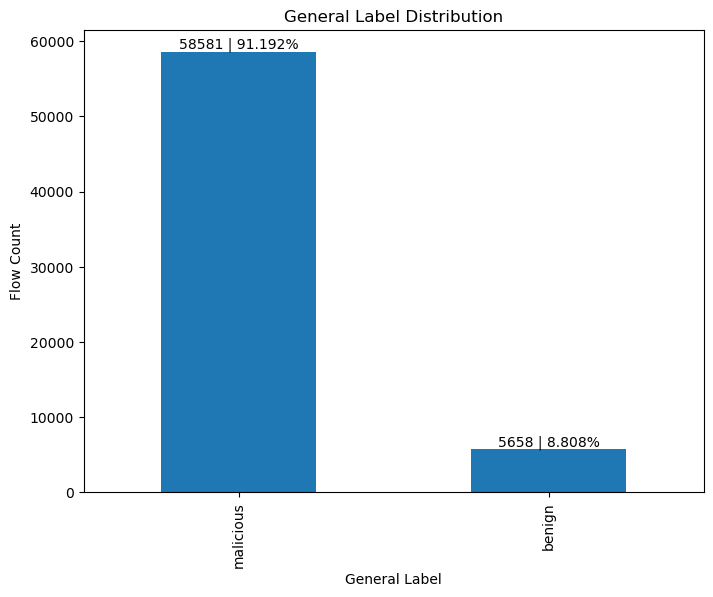

In [11]:
plt.figure(figsize=(8, 6))
bar = (
    ddos_df["General_Label"]
    .value_counts()
    .plot(kind="bar", title="General Label Distribution")
)
for p in bar.patches:
    plt.text(
        p.get_x() + p.get_width() / 2.0,
        p.get_height(),
        f"{p.get_height()} | {(p.get_height() / ddos_df.shape[0]) * 100 :.3f}%",
        ha="center",
        va="bottom",
    )
plt.xlabel("General Label")
plt.ylabel("Flow Count") 
plt.show()

#### Particular attack label distribution

Unique labels: ['ddos_udp_lag' 'ddos_snmp' 'ddos_ssdp' 'ddos_ldap' 'ddos_mssql'
 'ddos_udp' 'ddos_netbios' 'benign' 'ddos_syn' 'ddos_dns' 'ddos_tftp'
 'ddos_ntp']


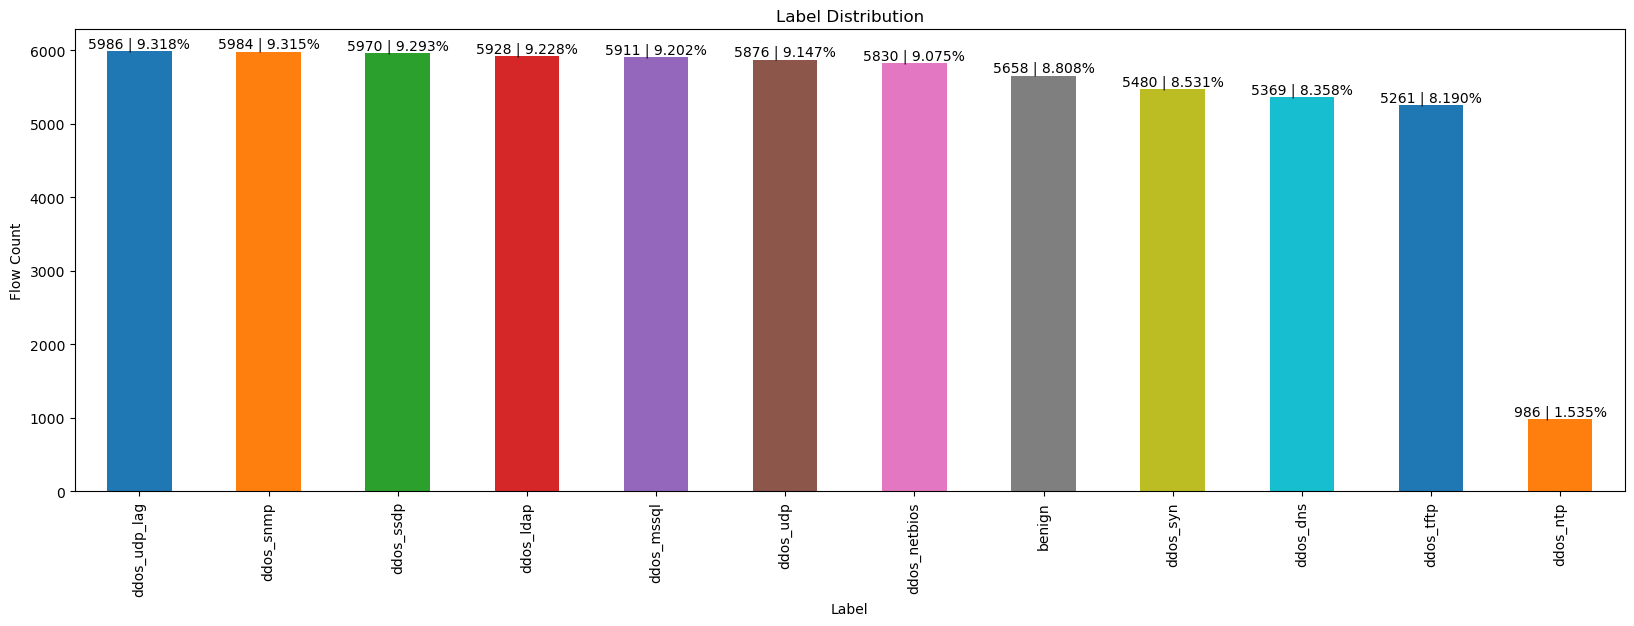

In [12]:
grouped_labels = ddos_df.groupby("label").size().sort_values(ascending=False)
print("Unique labels:", grouped_labels.index.values)

# color_map = 
colors = plt.cm.tab10.colors[:len(grouped_labels.index.values)]    


plt.figure(figsize=(20, 6))
bar = grouped_labels.plot(kind="bar", title="Label Distribution", color=colors)
for p in bar.patches:
    plt.text(
        p.get_x() + p.get_width() / 2.0,
        p.get_height(),
        f"{p.get_height()} | {(p.get_height() / ddos_df.shape[0]) * 100 :.3f}%",
        ha="center",
        va="bottom",
    )

plt.xlabel("Label") 
plt.ylabel("Flow Count")    

plt.show()

#### General Protocol Distribution

Protocol
17    48870
6     15311
0        58
Name: count, dtype: int64


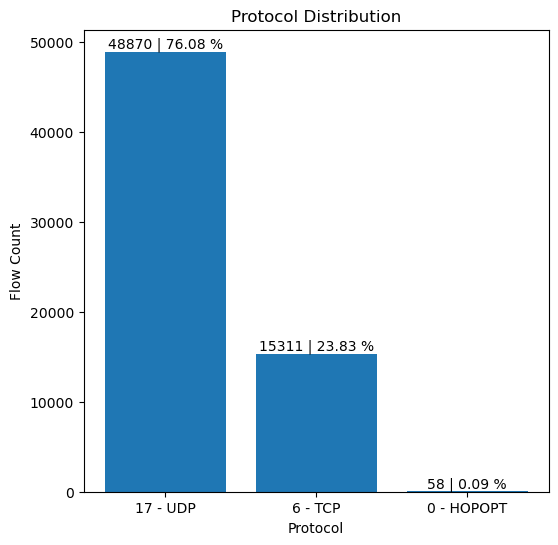

In [13]:
protocol_count_df = ddos_df["Protocol"].value_counts()
print(protocol_count_df)

fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(
    [f"{index} - {protocol_mapping.get(index)}" for index in protocol_count_df.index.values],
    protocol_count_df.values
)

for b in bars:
    h = b.get_height()
    ax.text(
        b.get_x() + b.get_width() / 2.0,
        h,
        f"{h} | {h/ ddos_df.shape[0] * 100 :.2f} %",
        ha="center",
        va="bottom",
    )

ax.set_title("Protocol Distribution") 
ax.set_xlabel("Protocol")   
ax.set_ylabel("Flow Count") 

plt.show()  

[17  0  6]


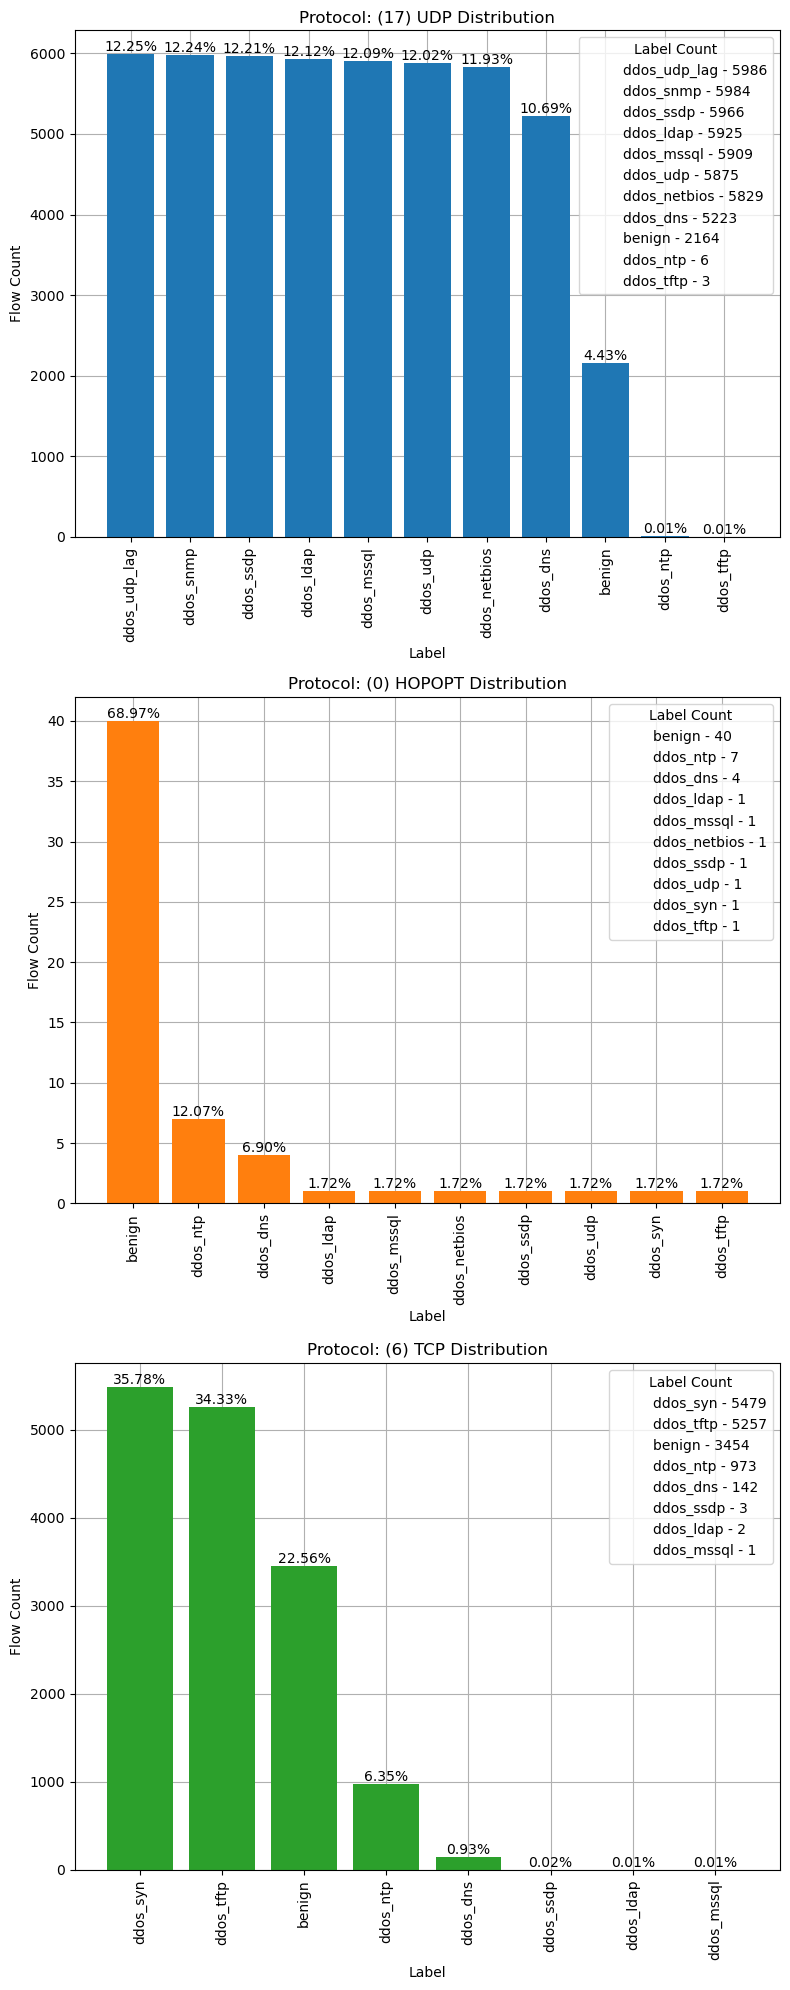

In [14]:
list_protocol = ddos_df["Protocol"].unique()
print(list_protocol)

fig, ax = plt.subplots(3, 1, figsize=(8, 20))

colors =  plt.cm.tab10.colors[:len(list_protocol)]      

for i, p in enumerate(list_protocol):

    ax[i].set_title(f"Protocol: ({p}) {protocol_mapping.get(p)} Distribution")
    x_prot_df = ddos_df[ddos_df["Protocol"] == p]
    res = x_prot_df["label"].value_counts()

    bars = ax[i].bar(res.index, res.values, color=colors[i])    

    handles = [plt.Line2D([0], [0],  linestyle='', label=f"{key} - {value}") 
           for key, value in zip(res.index, res.values)]    
    ax[i].legend(handles=handles, loc="upper right", title="Label Count")       
    ax[i].set_xlabel("Label")
    ax[i].set_ylabel("Flow Count")
    ax[i].grid(True)
    ax[i].set_axisbelow(True)
    for bar in bars:
        h = bar.get_height()
        ax[i].text(
            bar.get_x() + bar.get_width() / 2,
            h,
            f"{h/x_prot_df.shape[0] * 100:.2f}%",
            ha="center",
            va="bottom",
        )
    plt.setp(ax[i].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

## Time-Series Traffic Trends
Time-based trends often expose attack periods as spikes in traffic volume.This visualization shows how the traffic volume fluctuates across different hours of the day.

In [15]:
ddos_df["Timestamp"] = pd.to_datetime(ddos_df["Timestamp"])
day_group = ddos_df.groupby(ddos_df["Timestamp"].dt.date).size()
if day_group.values[-1] == ddos_df.shape[0]:
    print(f"All data flows are captured in the same day at {day_group.index[-1]}")
print(day_group)

initial_timestamp = ddos_df["Timestamp"].min()
final_timestamp = ddos_df["Timestamp"].max()
print("Initial timestamp:", initial_timestamp)
print("Final timestamp:", final_timestamp)
duration:pd.Timedelta = final_timestamp - initial_timestamp
print("Duration of flow capturing event:", duration.total_seconds(), "Seconds")
print("Duration of flow capturing event:", round(duration.total_seconds() / 3600, 2), "Hours")    

All data flows are captured in the same day at 2018-12-01
Timestamp
2018-12-01    64239
dtype: int64
Initial timestamp: 2018-12-01 09:17:11.183810
Final timestamp: 2018-12-01 13:34:27.985351
Duration of flow capturing event: 15436.801541 Seconds
Duration of flow capturing event: 4.29 Hours


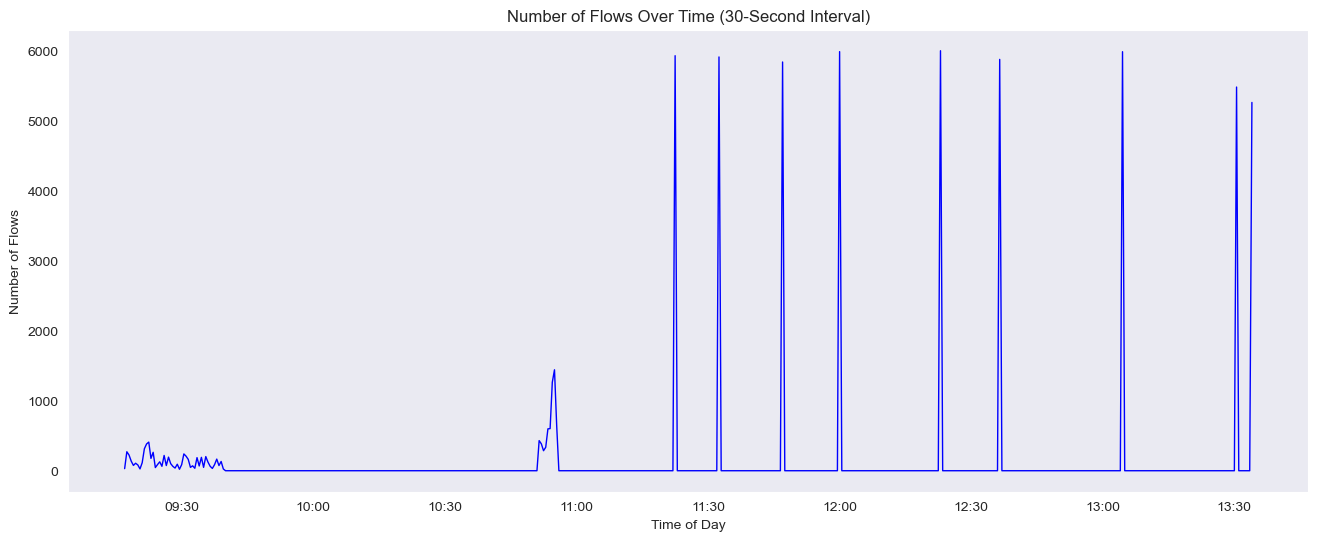

In [16]:

#Aggregate flows over time 
time_aggregated = ddos_df.set_index('Timestamp').resample('30s').size()

# time_aggregated["Timestamp"] = time_aggregated["Timestamp"].dt.time 
# time_aggregated = time_aggregated.set_index("Timestamp")    

# print(time_aggregated)
# # print(time_aggregated.index.dt.time)
# # Plot using Seaborn for a cleaner look
plt.figure(figsize=(16, 6))
sns.set_style("darkgrid")  # Set a grid-based background
plt.plot(time_aggregated.index, time_aggregated.values, color="blue", linewidth=1)

plt.title("Number of Flows Over Time (30-Second Interval)")
plt.ylabel("Number of Flows")
plt.xlabel("Time of Day")
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))


plt.grid()
plt.show()

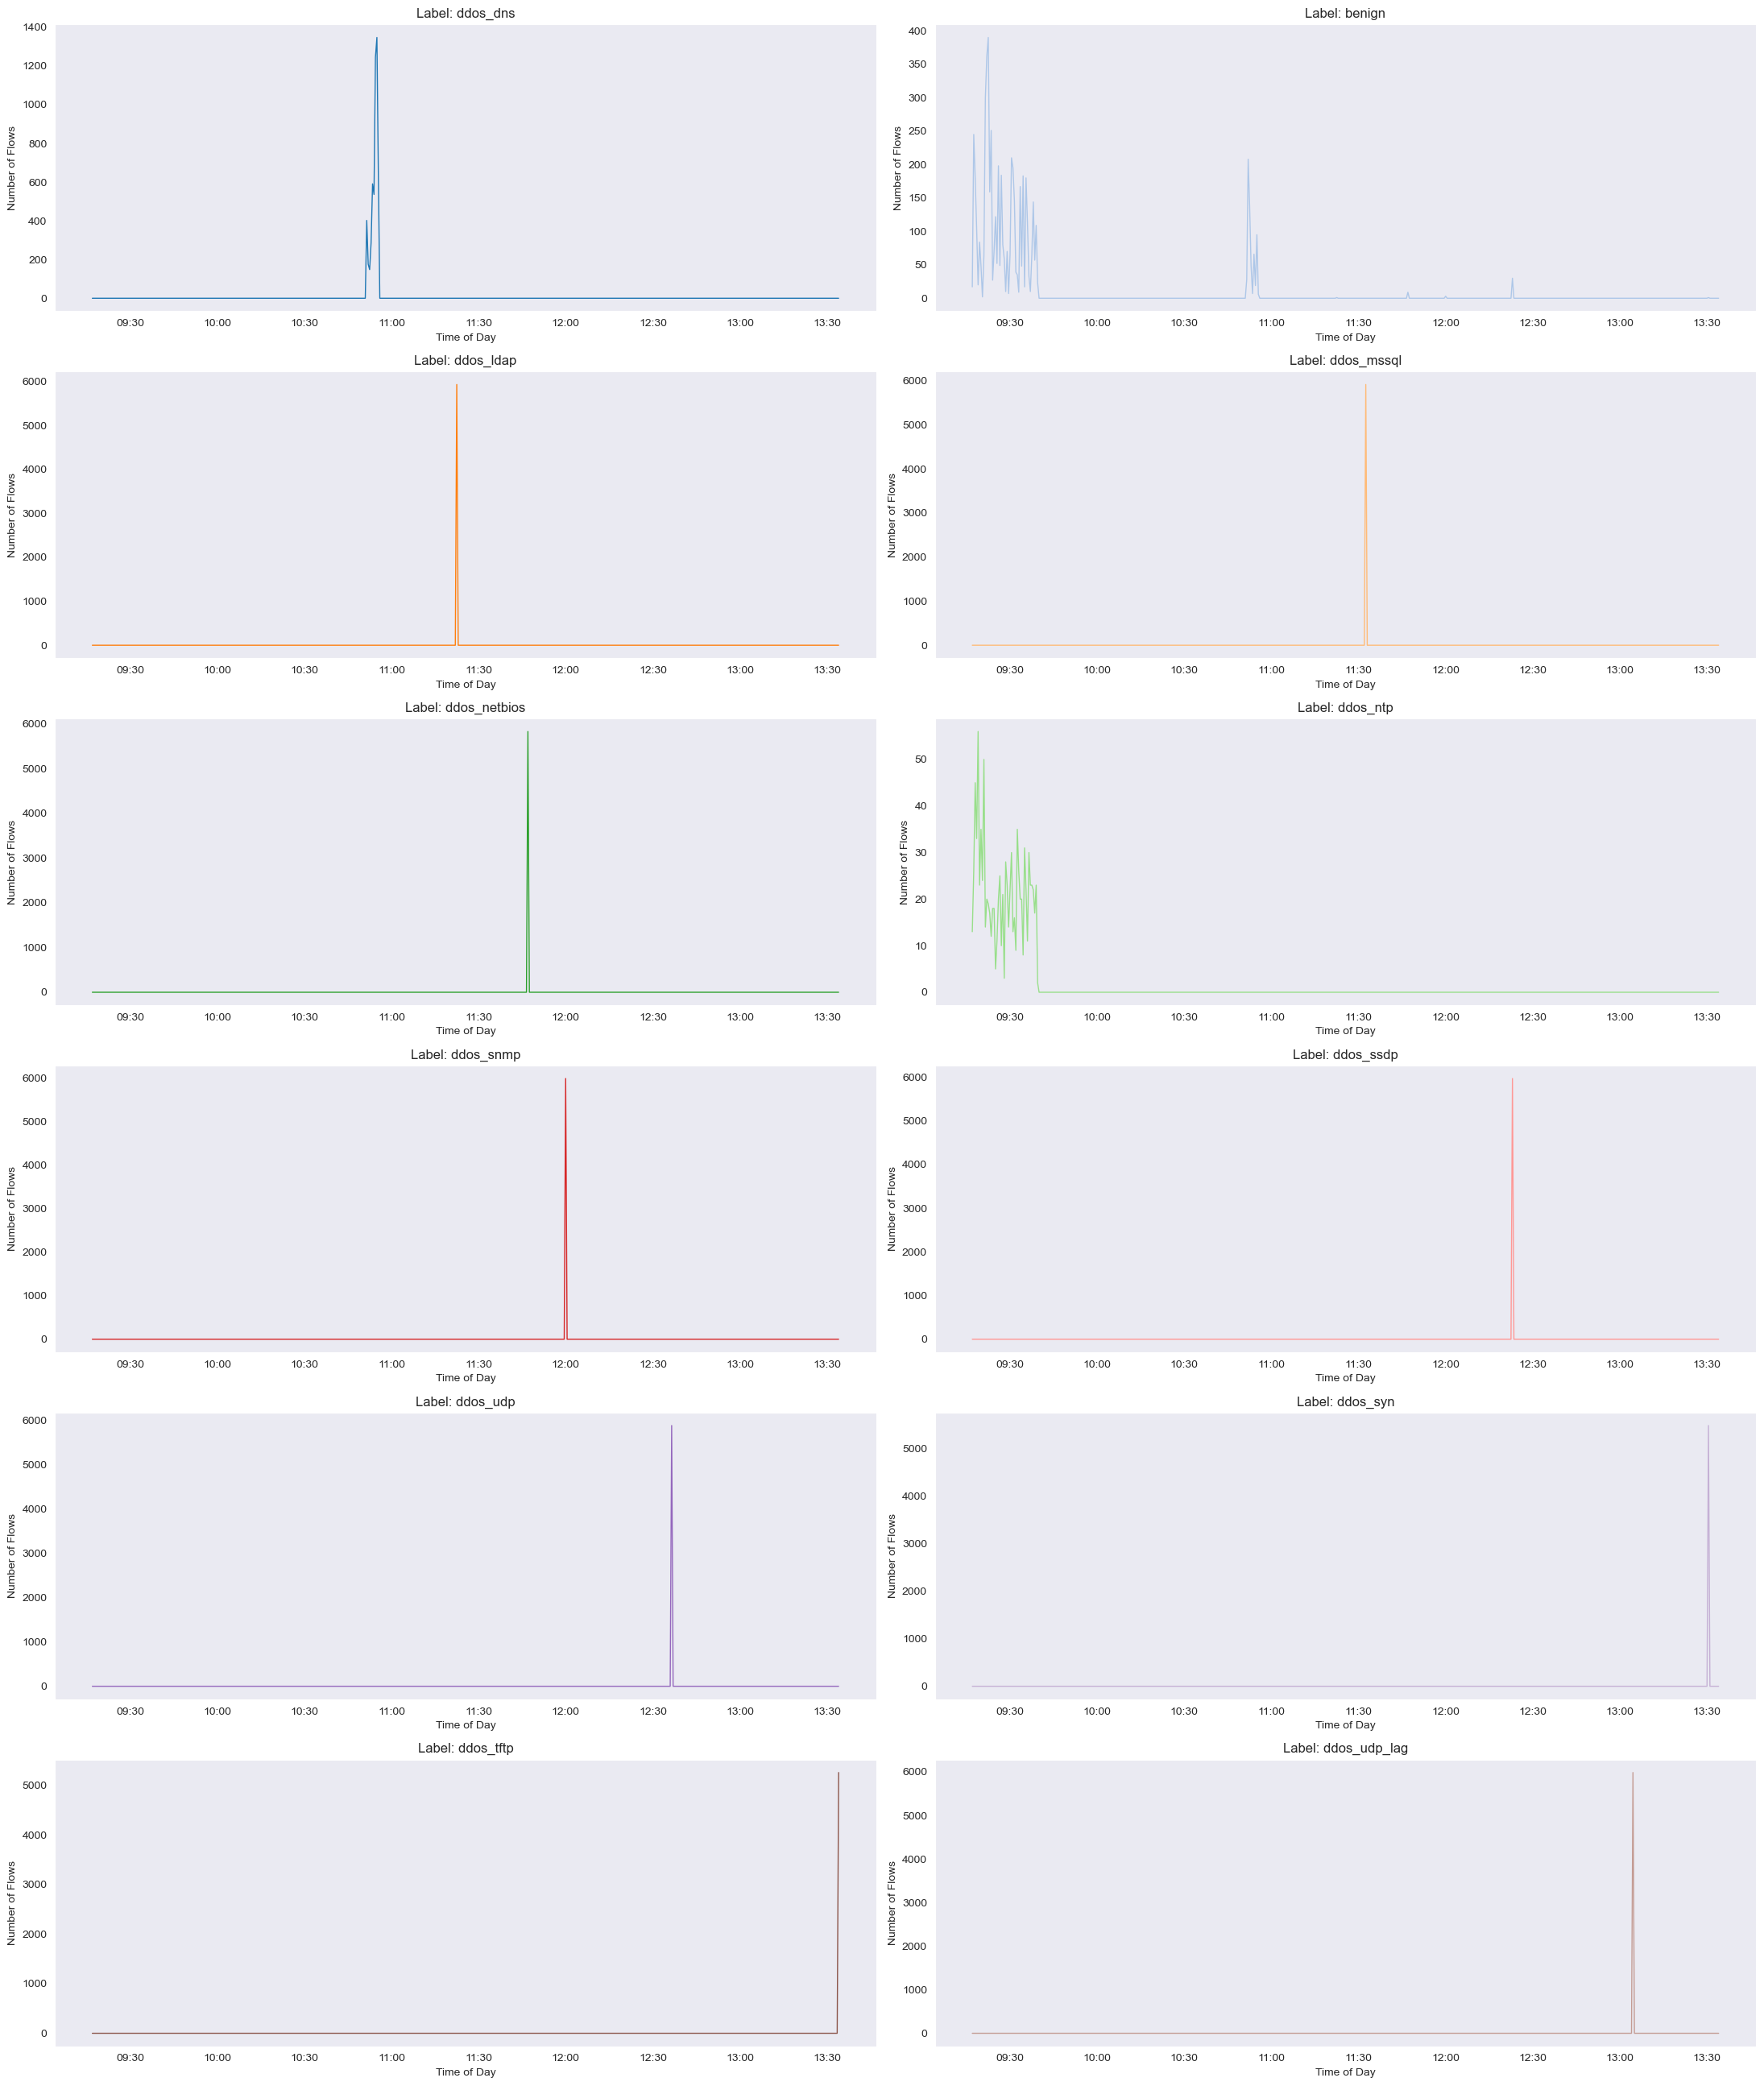

In [17]:
unique_labels = ddos_df["label"].unique()   
colors = plt.cm.tab20.colors[:len(unique_labels)] 
r , c  = len(unique_labels)//2, 2   
fig, ax =  plt.subplots(r, c, figsize=(22, 26))  
time_intervals_val =  ddos_df.set_index('Timestamp').resample('30s').size()
time_intervals_val[:] = 0 

for i, label in enumerate(unique_labels):
    row, col = i//c, i%c        
    label_df = ddos_df[ddos_df["label"] == label]
    time_aggregated:pd.Series = label_df.set_index('Timestamp').resample('30s').size()
    time_aggregated = time_aggregated.add(time_intervals_val, fill_value=0)
    ax[row, col].plot(time_aggregated.index, time_aggregated.values, color= colors[i], linewidth=1) 
    ax[row, col].set_title(f"Label: {label}")
    ax[row, col].set_ylabel("Number of Flows")
    ax[row, col].set_xlabel("Time of Day")
    ax[row, col].grid()
    ax[row, col].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M')) 

plt.tight_layout()
plt.show()        



#### General port distribution for source and destination 

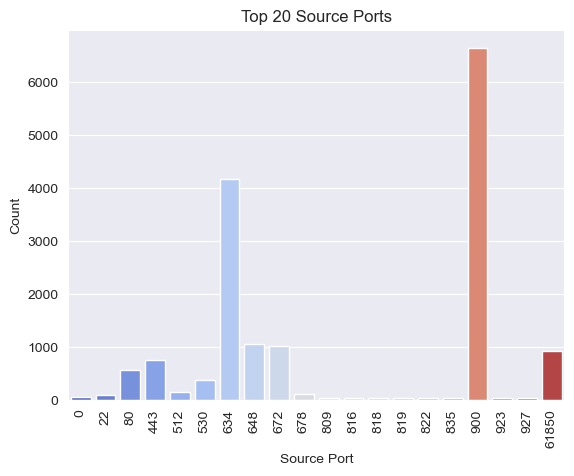

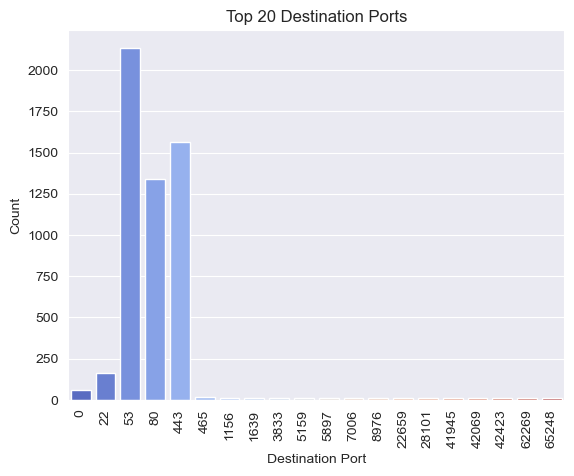

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Source Port distribution (top 20 most frequent)
top_source_ports = ddos_df['Source Port'].value_counts().nlargest(20)
sns.barplot(x=top_source_ports.index, y=top_source_ports.values, palette="coolwarm")
plt.title("Top 20 Source Ports")
plt.xlabel("Source Port")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# Plot Destination Port distribution (top 20 most frequent)
top_destination_ports = ddos_df['Destination Port'].value_counts().nlargest(20)
sns.barplot(x=top_destination_ports.index, y=top_destination_ports.values, palette="coolwarm")
plt.title("Top 20 Destination Ports")
plt.xlabel("Destination Port")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


#### ECDF for source port (general) and (classified)

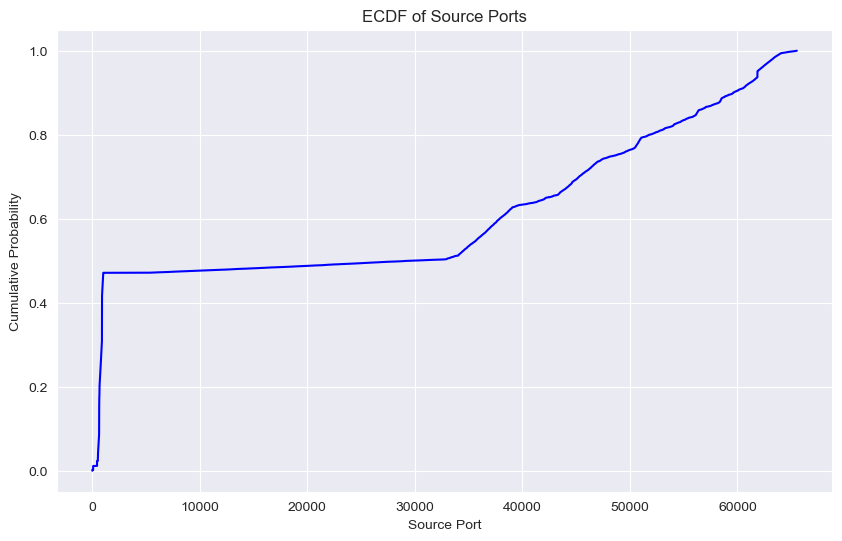

In [19]:

data = ddos_df['Source Port'].sort_values() 
# print(data)
y = np.arange(1, data.size + 1) / data.size

plt.figure(figsize=(10, 6))
plt.plot(data.values, y, linestyle='-', color='b')

plt.title('ECDF of Source Ports')
plt.xlabel('Source Port')
plt.ylabel('Cumulative Probability')

plt.grid(True)
plt.show()      


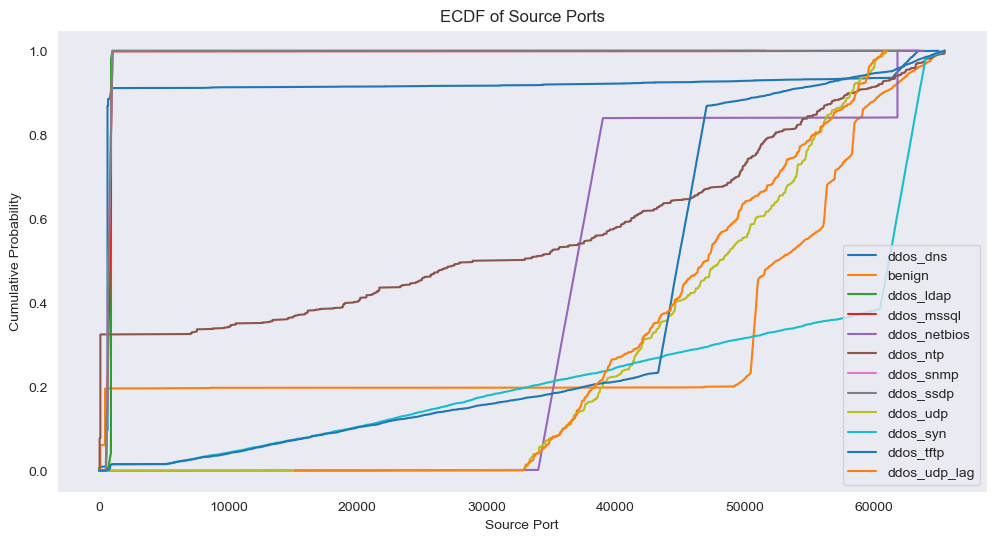

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))

# ECDF for each label
labels = ddos_df['label'].unique()

for label in labels:
    sorted_data = ddos_df[ddos_df['label'] == label]['Source Port'].sort_values()   
    y = np.arange(1, sorted_data.size + 1) / sorted_data.size   
    ax.plot(sorted_data.values, y, label=f'{label}')

ax.set_xlabel('Source Port')
ax.set_ylabel('Cumulative Probability')
ax.set_title('ECDF of Source Ports')
ax.grid()
ax.legend()
plt.show()


#### ECDF for destination port (general) and (classified)

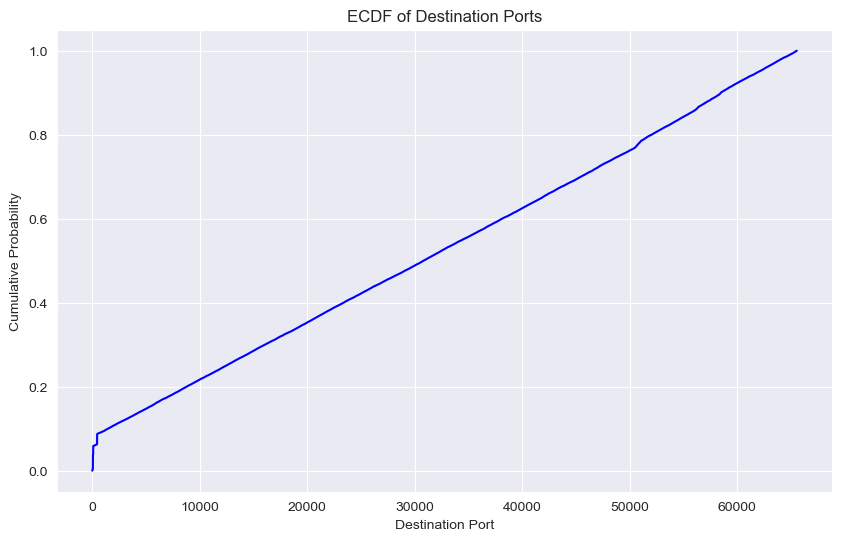

In [21]:
data = ddos_df['Destination Port'].sort_values() 
y = np.arange(1, data.size + 1) / data.size

plt.figure(figsize=(10, 6))
plt.plot(data.values, y, linestyle='-', color='b')

plt.title('ECDF of Destination Ports')
plt.xlabel('Destination Port')
plt.ylabel('Cumulative Probability')

plt.grid(True)
plt.show()      

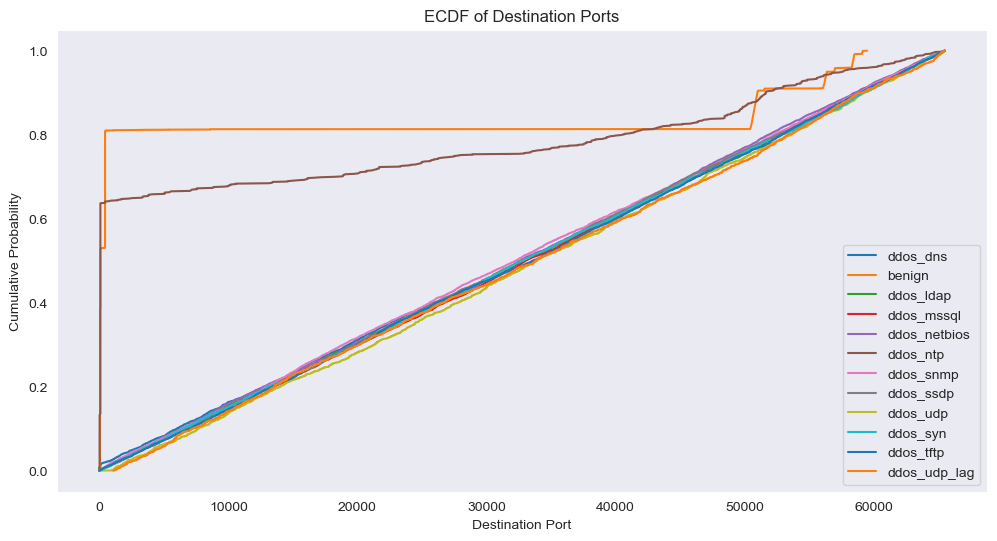

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))

# ECDF for each label
labels = ddos_df['label'].unique()

for label in labels:
    sorted_data = ddos_df[ddos_df['label'] == label]['Destination Port'].sort_values()   
    y = np.arange(1, sorted_data.size + 1) / sorted_data.size   
    ax.plot(sorted_data.values, y, label=f'{label}')

ax.set_xlabel('Destination Port')
ax.set_ylabel('Cumulative Probability')
ax.set_title('ECDF of Destination Ports')
ax.grid()
ax.legend()
plt.show()

#### Calculation of outliers for each feature per label

In [23]:

grouped_labels = ddos_df.groupby("label") 
numerical_features = ddos_df.select_dtypes(include=[np.number]).columns  
outliers_df = pd.DataFrame(columns=['feature', 'label', 'outliers', 'outliers_percentage'])  
row_count = 0
for label, group in grouped_labels:  
    for feature in numerical_features: 
        feature_group = group[feature]  
        q1 = feature_group.quantile(0.25)
        q3 = feature_group.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = group[(feature_group < lower_bound) | (feature_group > upper_bound)]
        outliers_percentage = outliers.shape[0] / group.shape[0] * 100
        outliers_df.loc[row_count] = [feature, label, outliers.shape[0], outliers_percentage]    
        row_count += 1  

outliers_df = outliers_df.sort_values(by='outliers_percentage', ascending=False).reset_index(drop=True)
outliers_df



feature      label  outliers  outliers_percentage
0    Total Backward Packets     benign      2572            45.457759
1       Subflow Bwd Packets     benign      2572            45.457759
2       Average Packet Size   ddos_dns      2292            42.689514
3     Fwd Packet Length Min   ddos_dns      1974            36.766623
4        Packet Length Mean   ddos_dns      1974            36.766623
..                      ...        ...       ...                  ...
835           Bwd IAT Total  ddos_snmp         0             0.000000
836          Flow Packets/s  ddos_snmp         0             0.000000
837            Flow Bytes/s  ddos_snmp         0             0.000000
838   Bwd Packet Length Std  ddos_snmp         0             0.000000
839             Source Port  ddos_snmp         0             0.000000

[840 rows x 4 columns]

#### Plotting the outliers for each feature related to label 

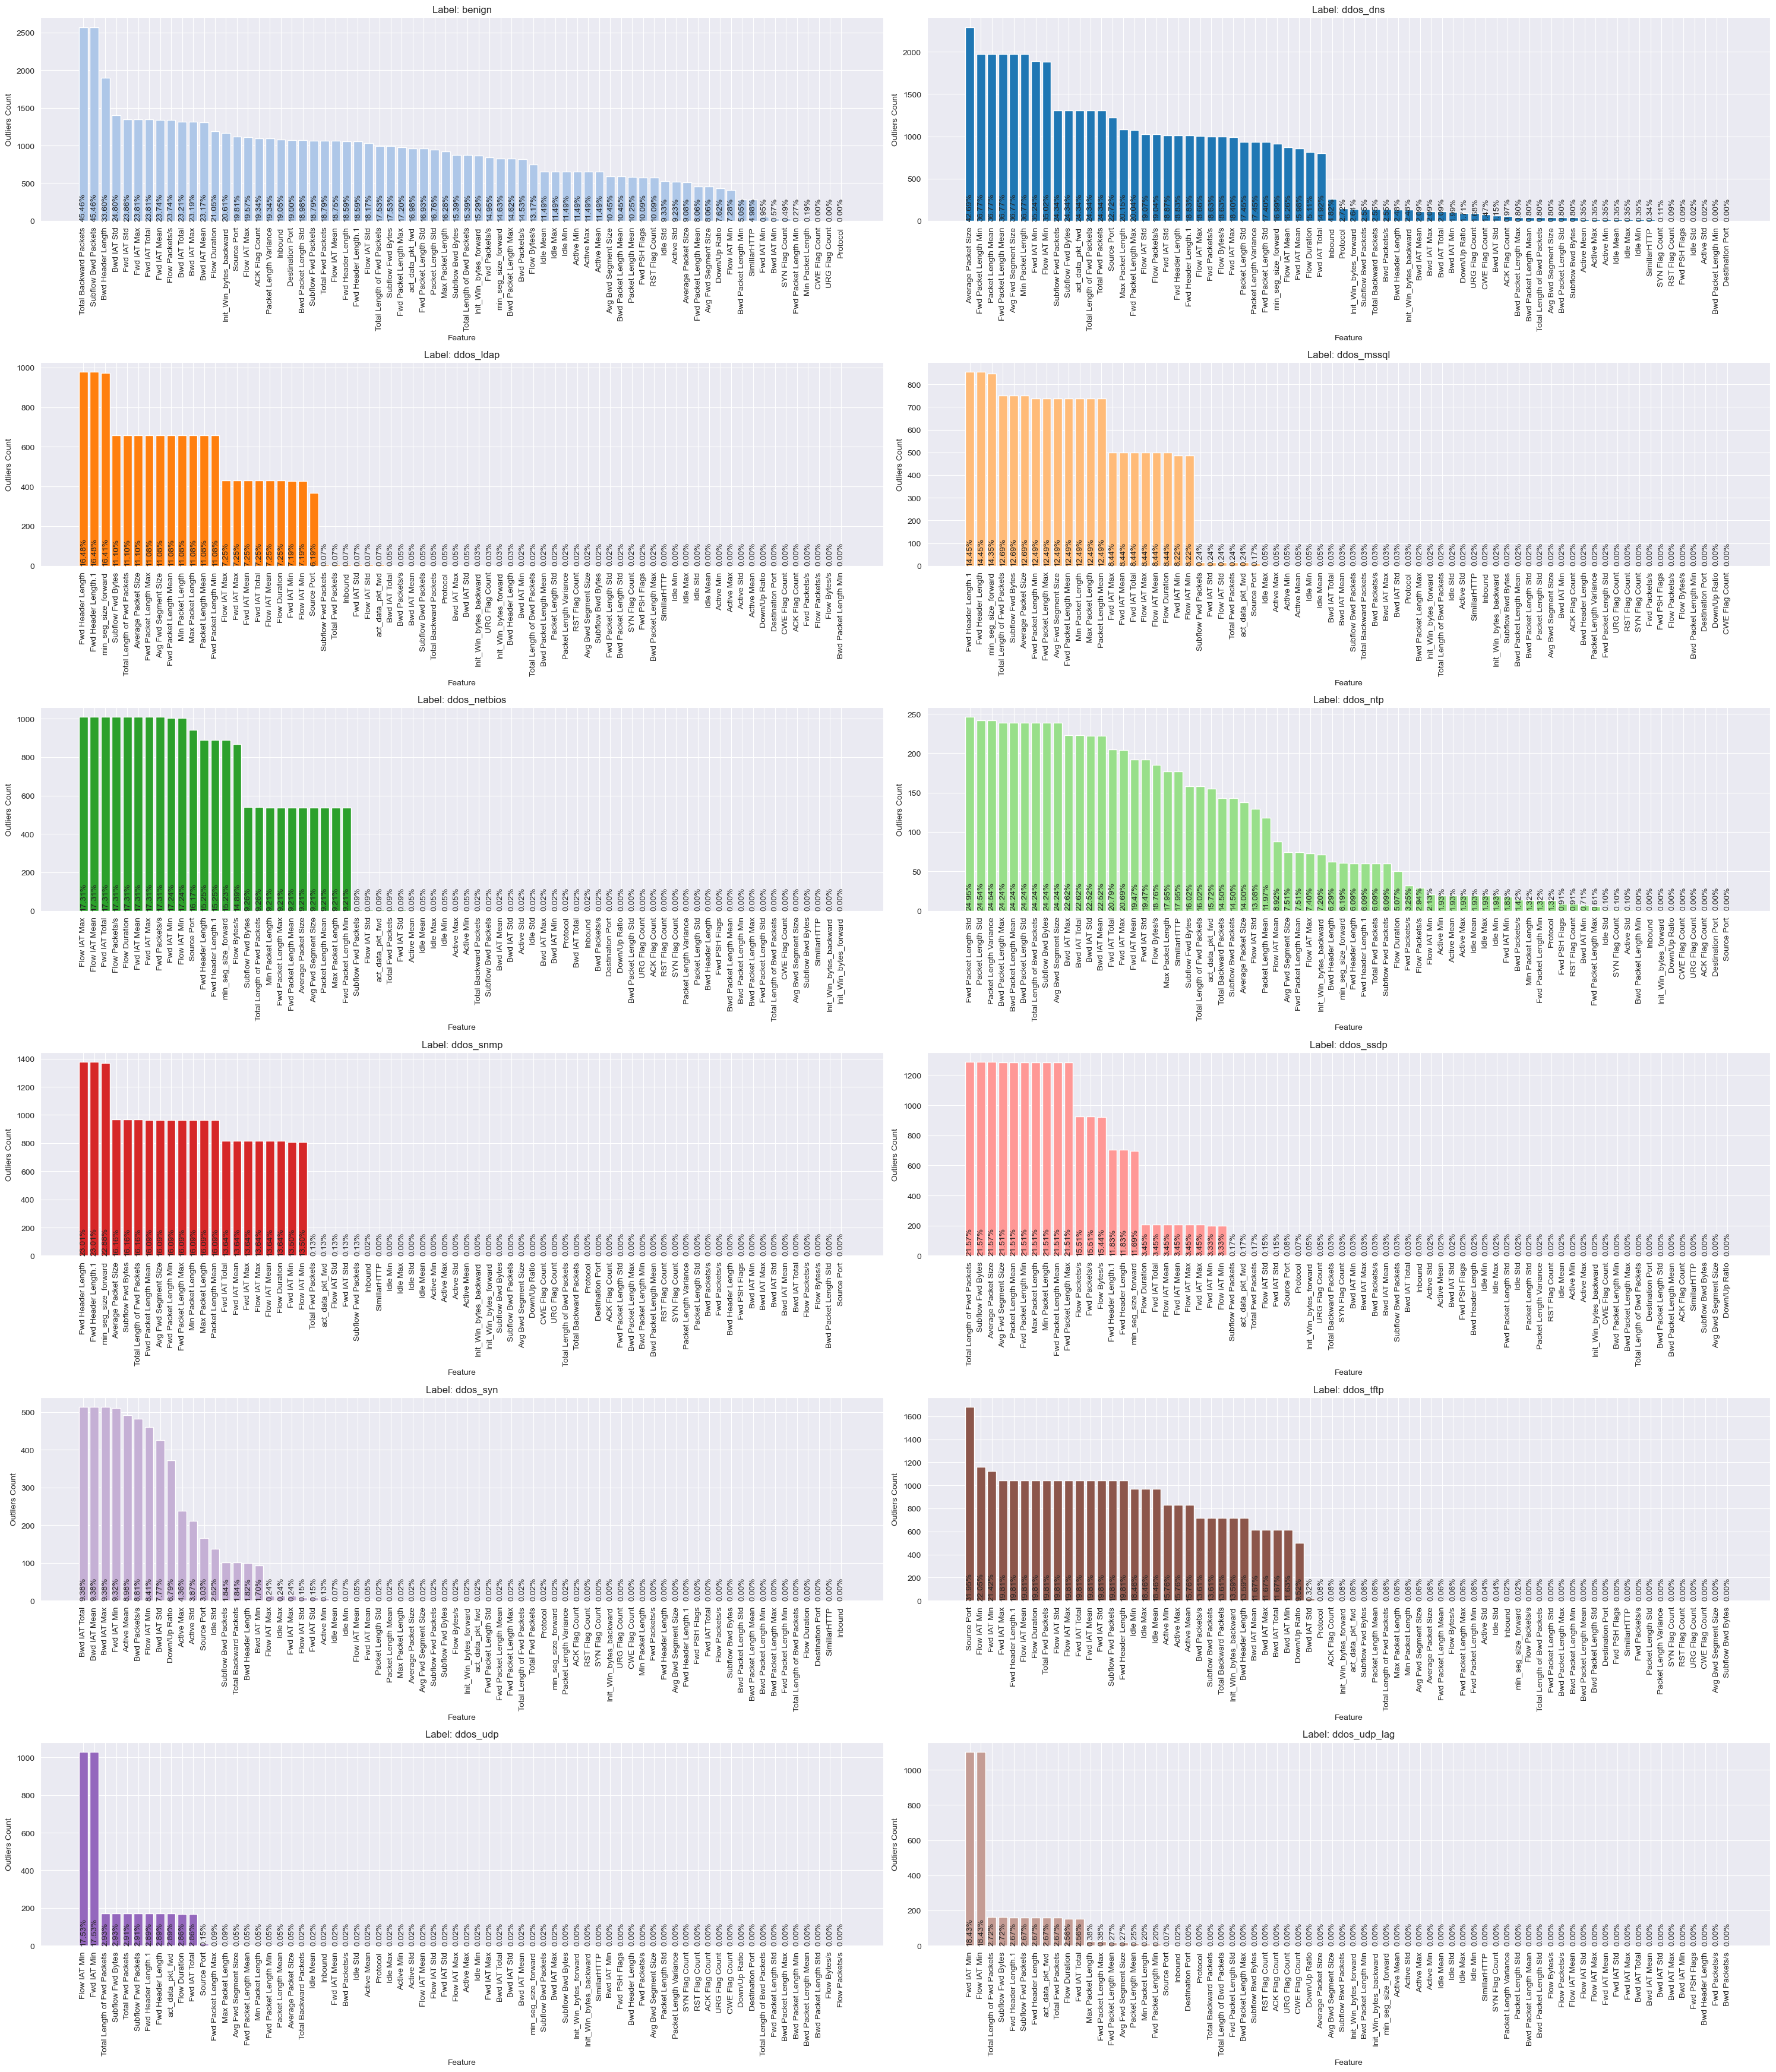

In [24]:
unique_labels = ddos_df["label"].unique()
color_label_map = dict(zip(unique_labels, cm.tab20.colors[:len(unique_labels)]))
r, c = len(unique_labels)//2, 2 
fig, ax = plt.subplots(r, c, figsize=(30,35))

i = 0
for label, group in  outliers_df.groupby("label"):  
    row, col = i//c, i%c
    outliers_df_label = group.loc[:, ["feature", "outliers", "outliers_percentage"]].reset_index()      
    bars = ax[row, col].bar(outliers_df_label["feature"], outliers_df_label["outliers"], color=color_label_map.get(label))
    for j, bar in enumerate(bars):
        percentage = outliers_df_label.loc[j, "outliers_percentage"]     
        ax[row, col].text(
            bar.get_x() + bar.get_width() / 2,
            h,
            f"{percentage:.2f}%",
            ha="center",
            va="bottom",
            rotation=90
        )
    
    ax[row, col].set_title(f"Label: {label}")   
    ax[row, col].set_xlabel("Feature")
    ax[row, col].set_ylabel("Outliers Count")
    ax[row, col].tick_params(axis='x', rotation=90) 
    i += 1
   

plt.tight_layout()  
plt.xticks(rotation=90) 
    
plt.show()

In [25]:
feature_group_outliers = outliers_df.groupby('feature').agg({
    "outliers": "mean", 
    "outliers_percentage": "mean"   
}).rename(columns={"outliers": "outliers_mean", "outliers_percentage": "outliers_percentage_mean" } ).reset_index() 

feature_group_outliers = feature_group_outliers.sort_values(by='outliers_percentage_mean', ascending=False).reset_index(drop=True)  
feature_group_outliers


feature  outliers_mean  outliers_percentage_mean
0            Flow IAT Min     749.250000                 13.360559
1             Fwd IAT Min     721.583333                 12.850315
2     Fwd Header Length.1     691.500000                 12.491285
3       Fwd Header Length     691.500000                 12.491285
4     Average Packet Size     595.916667                 11.385801
..                    ...            ...                       ...
65  Bwd Packet Length Min      23.833333                  0.421232
66               Protocol      14.583333                  0.359806
67         URG Flag Count       7.916667                  0.146690
68         CWE Flag Count       6.666667                  0.124013
69         SYN Flag Count       3.166667                  0.063201

[70 rows x 3 columns]

#### Mean of outlier features distribution

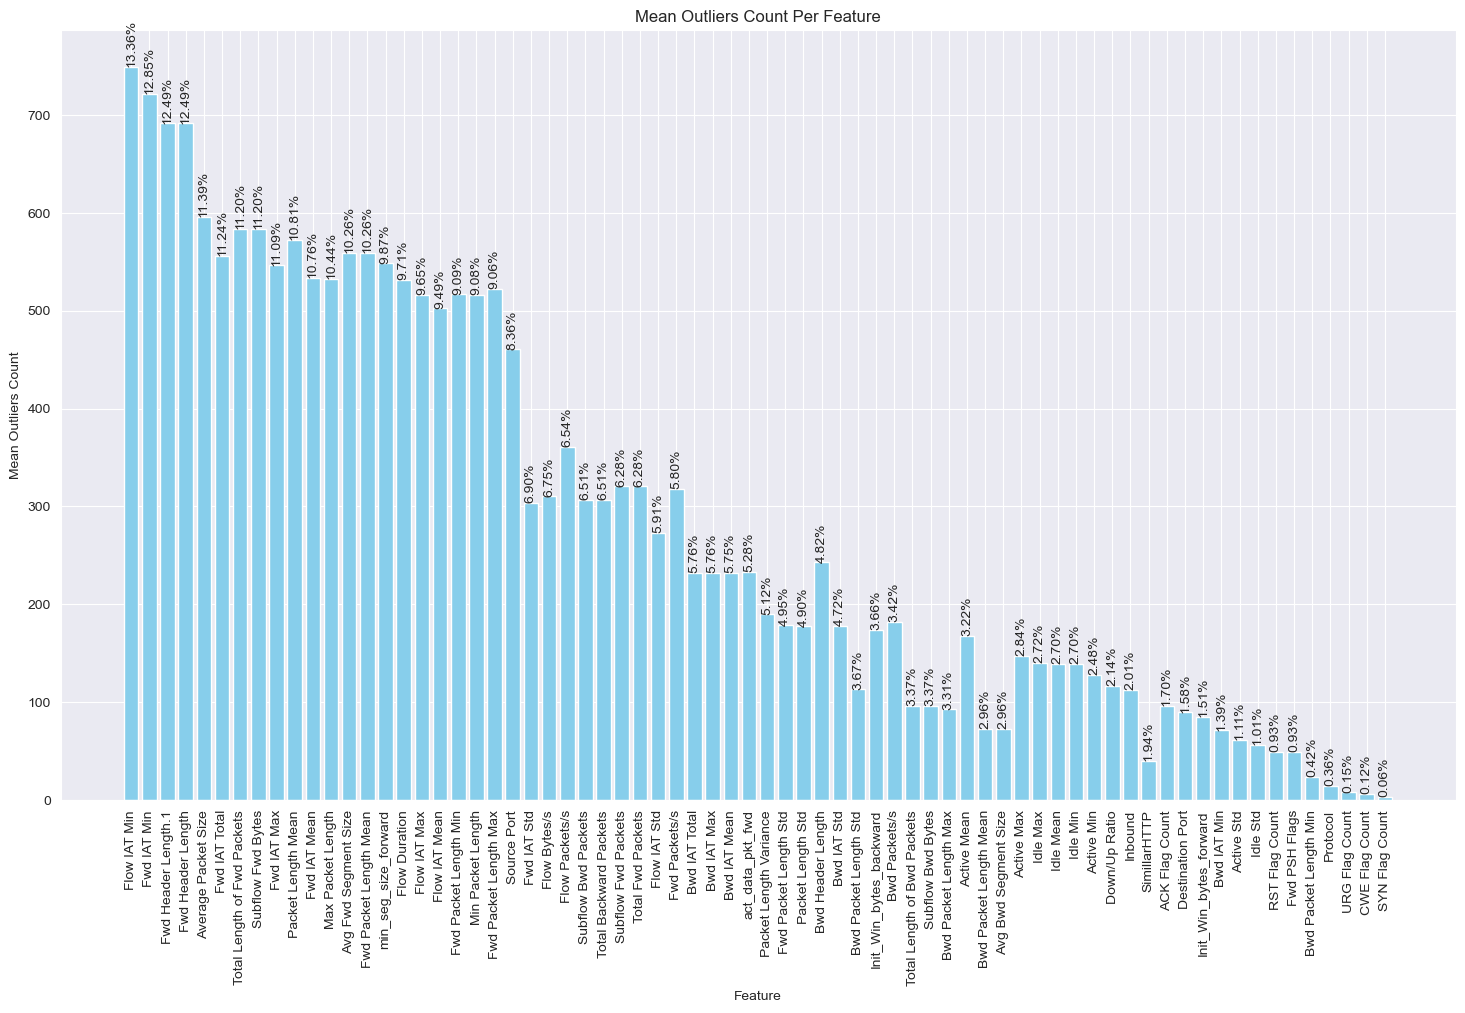

In [26]:

fig, ax = plt.subplots(figsize=(18, 10)) 
bar = ax.bar(feature_group_outliers['feature'], feature_group_outliers['outliers_mean'], color='skyblue')  
for i, bar in enumerate(bar):
    p = feature_group_outliers.loc[i, "outliers_percentage_mean"]       
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        bar.get_height(),
        f"{p:.2f}%",
        ha="center",
        va="bottom",
        rotation=90,    

    )
ax.set_title("Mean Outliers Count Per Feature")
ax.set_xlabel("Feature")
ax.set_ylabel("Mean Outliers Count")
plt.xticks(rotation=90)
plt.show()

In [27]:
# selecting 3 features with highest mean outliers percentage
top_features = feature_group_outliers.head(3)['feature'].values 
print("Features with highest mean outliers percentage:", top_features)  

#selecting with lowest mean outliers percentage 
bottom_features = feature_group_outliers.tail(3)['feature'].values      
print("Features with lowest mean outliers percentage:", bottom_features)

mean_outliers = feature_group_outliers['outliers_percentage_mean'].mean()     
# print("Mean Outliers Count:", mean_outliers)     

feature_group_outliers['outliers_mean_dist'] = (feature_group_outliers['outliers_percentage_mean'] - mean_outliers).abs()
feature_group_outliers = feature_group_outliers.sort_values(by='outliers_mean_dist', ascending=True)       



# selecting 3 features with nearest mean outliers count to the overall mean 
near_mean_features = feature_group_outliers.head(3)['feature'].values
print("Features with nearest mean outliers distance:", near_mean_features)


Features with highest mean outliers percentage: ['Flow IAT Min' 'Fwd IAT Min' 'Fwd Header Length.1']
Features with lowest mean outliers percentage: ['URG Flag Count' 'CWE Flag Count' 'SYN Flag Count']
Features with nearest mean outliers distance: ['Bwd IAT Mean' 'Bwd IAT Max' 'Bwd IAT Total']


#### Boxplot of Top Features with Highest Mean Outliers Percentage

Label: ['ddos_dns' 'benign' 'ddos_ldap' 'ddos_mssql' 'ddos_netbios' 'ddos_ntp'
 'ddos_snmp' 'ddos_ssdp' 'ddos_udp' 'ddos_syn' 'ddos_tftp' 'ddos_udp_lag']


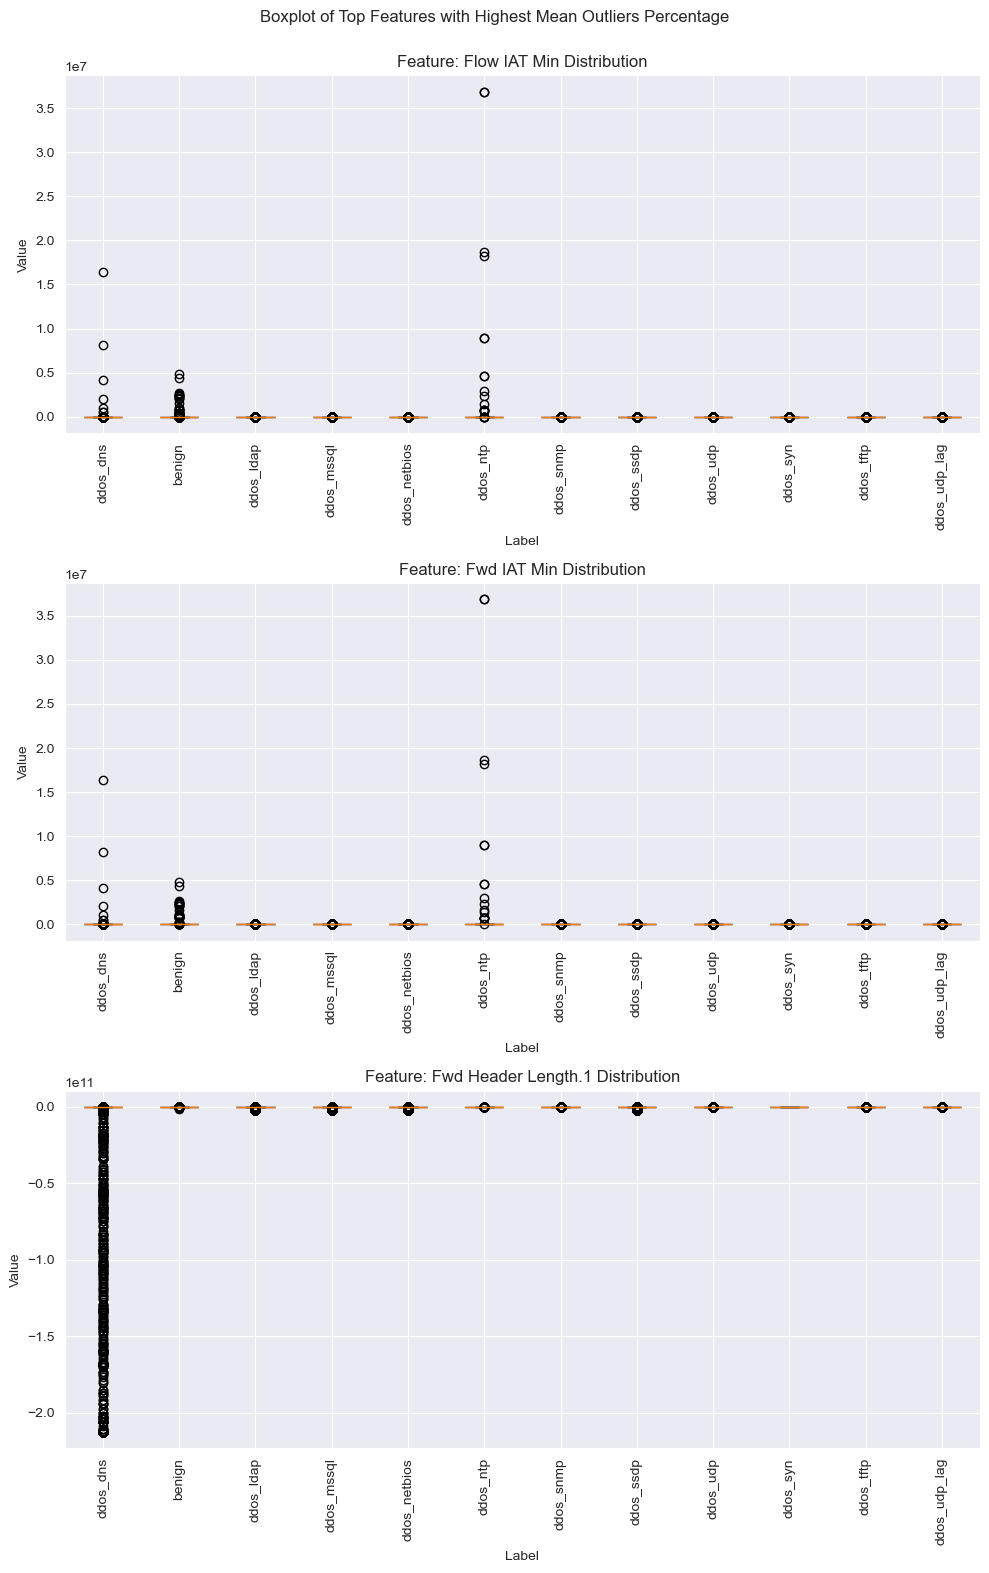

In [28]:
print("Label:", unique_labels)
fig, ax = plt.subplots(len(top_features), 1, figsize=(10, 16))
fig.suptitle("Boxplot of Top Features with Highest Mean Outliers Percentage")
for i, feature in enumerate(top_features):
    data_to_plot = [
        ddos_df[ddos_df["label"] == label][feature].values for label in unique_labels
    ]
    ax[i].boxplot(data_to_plot, patch_artist=True)  
    ax[i].set_title(f"Feature: {feature} Distribution")
    ax[i].set_xlabel("Label")
    ax[i].set_ylabel("Value")
    ax[i].set_xticklabels(unique_labels)    
    ax[i].tick_params(axis='x', rotation=90) 

plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()  


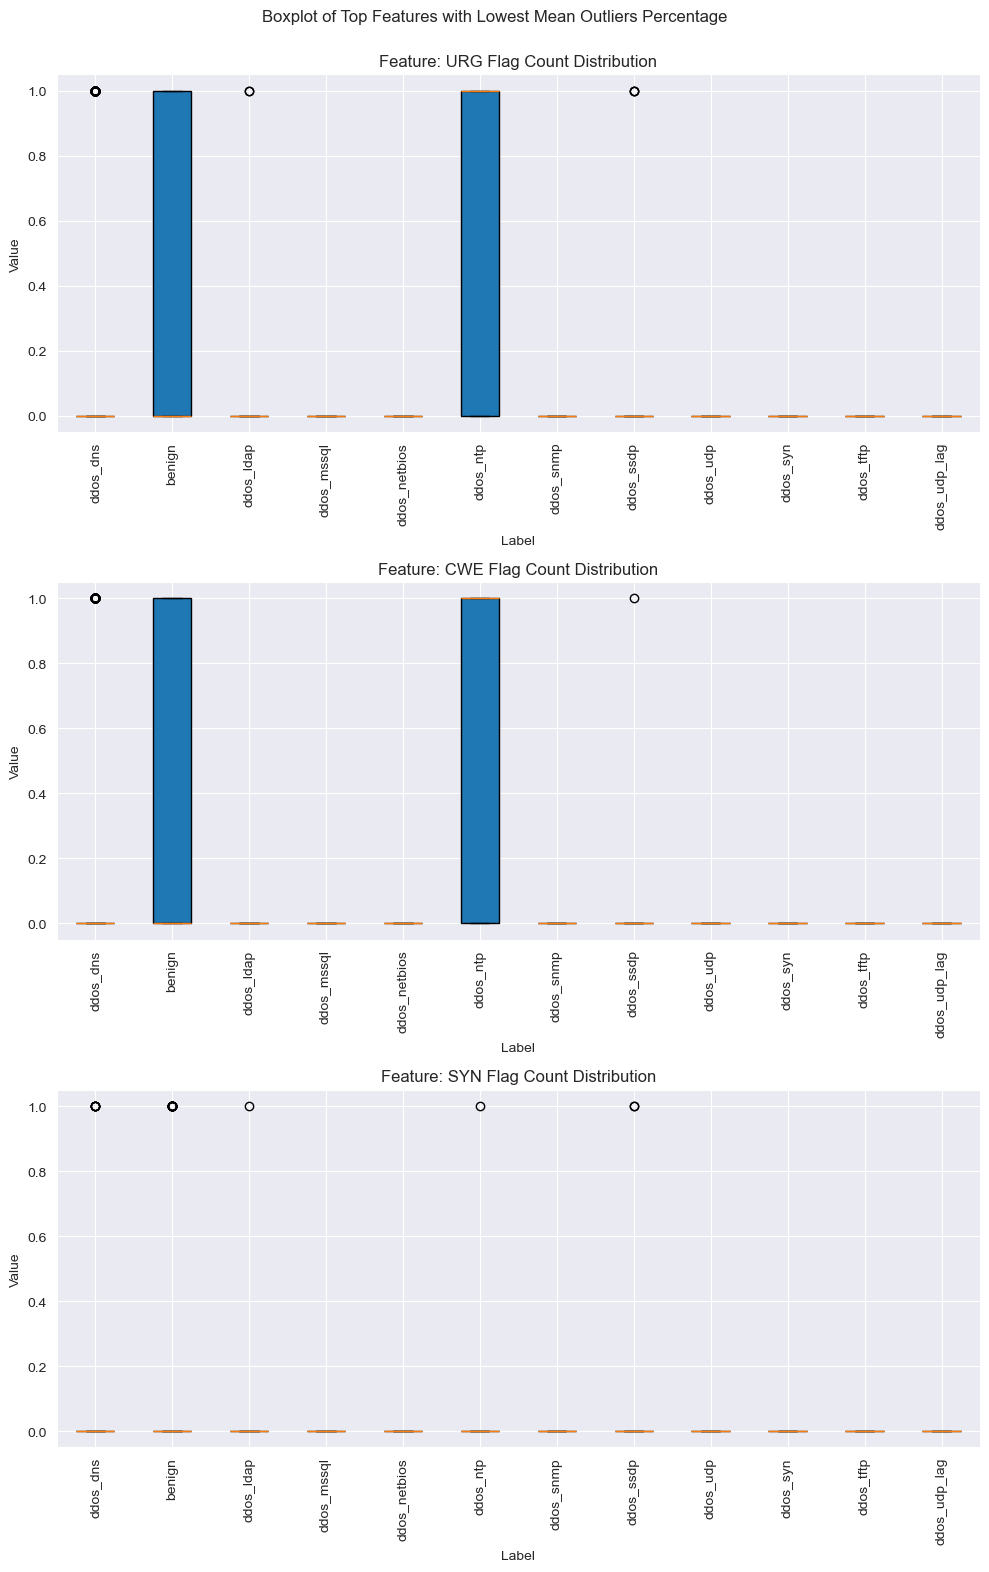

In [29]:
fig, ax = plt.subplots(len(bottom_features), 1, figsize=(10, 16))
fig.suptitle("Boxplot of Top Features with Lowest Mean Outliers Percentage")
for i, feature in enumerate(bottom_features):
    data_to_plot = [
        ddos_df[ddos_df["label"] == label][feature].values for label in unique_labels
    ]
    ax[i].boxplot(data_to_plot, patch_artist=True)  
    ax[i].set_title(f"Feature: {feature} Distribution")
    ax[i].set_xlabel("Label")
    ax[i].set_ylabel("Value")
    ax[i].set_xticklabels(unique_labels)    
    ax[i].tick_params(axis='x', rotation=90) 

plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()  

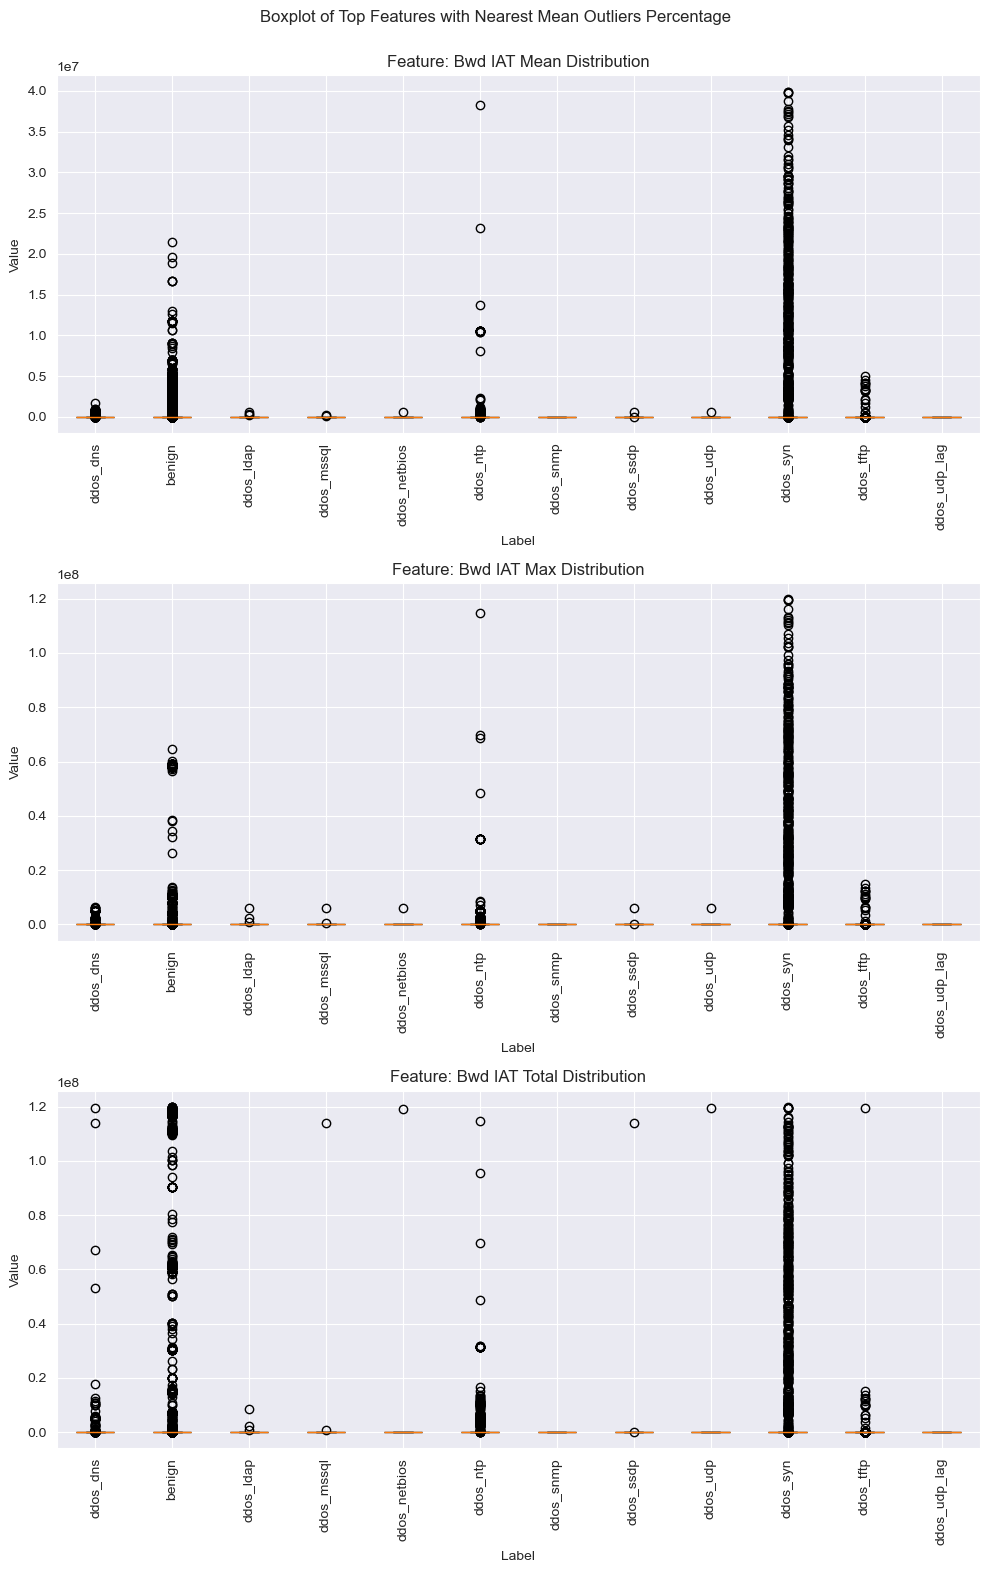

In [30]:
fig, ax = plt.subplots(len(near_mean_features), 1, figsize=(10, 16))
fig.suptitle("Boxplot of Top Features with Nearest Mean Outliers Percentage")
for i, feature in enumerate(near_mean_features):
    data_to_plot = [
        ddos_df[ddos_df["label"] == label][feature].values for label in unique_labels
    ]
    ax[i].boxplot(data_to_plot, patch_artist=True)  
    ax[i].set_title(f"Feature: {feature} Distribution")
    ax[i].set_xlabel("Label")
    ax[i].set_ylabel("Value")
    ax[i].set_xticklabels(unique_labels)    
    ax[i].tick_params(axis='x', rotation=90) 

plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()  

In [31]:
label_group_outliers_df = outliers_df.groupby('label').agg({
    "outliers": "mean", 
    "outliers_percentage": "mean"   
}).rename(columns={"outliers": "outliers_mean", "outliers_percentage": "outliers_percentage_mean" } ).reset_index()

label_group_outliers_df = label_group_outliers_df.sort_values(by='outliers_percentage_mean', ascending=False)   
label_group_outliers_df

label  outliers_mean  outliers_percentage_mean
0         benign     852.628571                 15.069434
1       ddos_dns     634.728571                 11.822100
5       ddos_ntp      94.600000                  9.594320
9      ddos_tftp     406.800000                  7.732370
4   ddos_netbios     285.571429                  4.898309
6      ddos_snmp     290.257143                  4.850554
7      ddos_ssdp     278.114286                  4.658531
3     ddos_mssql     201.000000                  3.400440
2      ddos_ldap     190.971429                  3.221515
8       ddos_syn      79.028571                  1.442127
11  ddos_udp_lag      53.714286                  0.897332
10      ddos_udp      52.185714                  0.888116

In [32]:
numerical_features = [feature for feature in ddos_df.columns if ddos_df[feature].dtype != 'O']
print("Numerical Features:", numerical_features)

category_features = [feature for feature in ddos_df.columns if ddos_df[feature].dtype == 'O']
print("Category Features:", category_features)  

Numerical Features: ['Source Port', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count', 'RST Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'A

In [33]:
copy_ddos_df = ddos_df.copy()   

print("Initial shape:", copy_ddos_df.shape) 

copy_ddos_df = copy_ddos_df.drop(columns=category_features)

print("Shape after dropping category features:", copy_ddos_df.shape)    

Initial shape: (64239, 76)
Shape after dropping category features: (64239, 71)


In [34]:
df_label = pd.DataFrame(ddos_df['label'])

# Applying LabelEncoder to each categorical column
label_encoder = LabelEncoder()
for feature in category_features:
    if feature == 'label':
        df_label['intLabel'] = label_encoder.fit_transform(ddos_df[feature])
    else:  
        ddos_df[feature] = label_encoder.fit_transform(ddos_df[feature])

reference_date = pd.to_datetime('2018-12-01 10:51:39.813448')
ddos_df['Timestamp'] = (ddos_df['Timestamp'] - reference_date).dt.total_seconds()

In [35]:
min_timestamp = copy_ddos_df['Timestamp'].min() 
copy_ddos_df['Timestamp'] = (copy_ddos_df['Timestamp'] - min_timestamp).dt.total_seconds()

#### Correlation matrix for features  

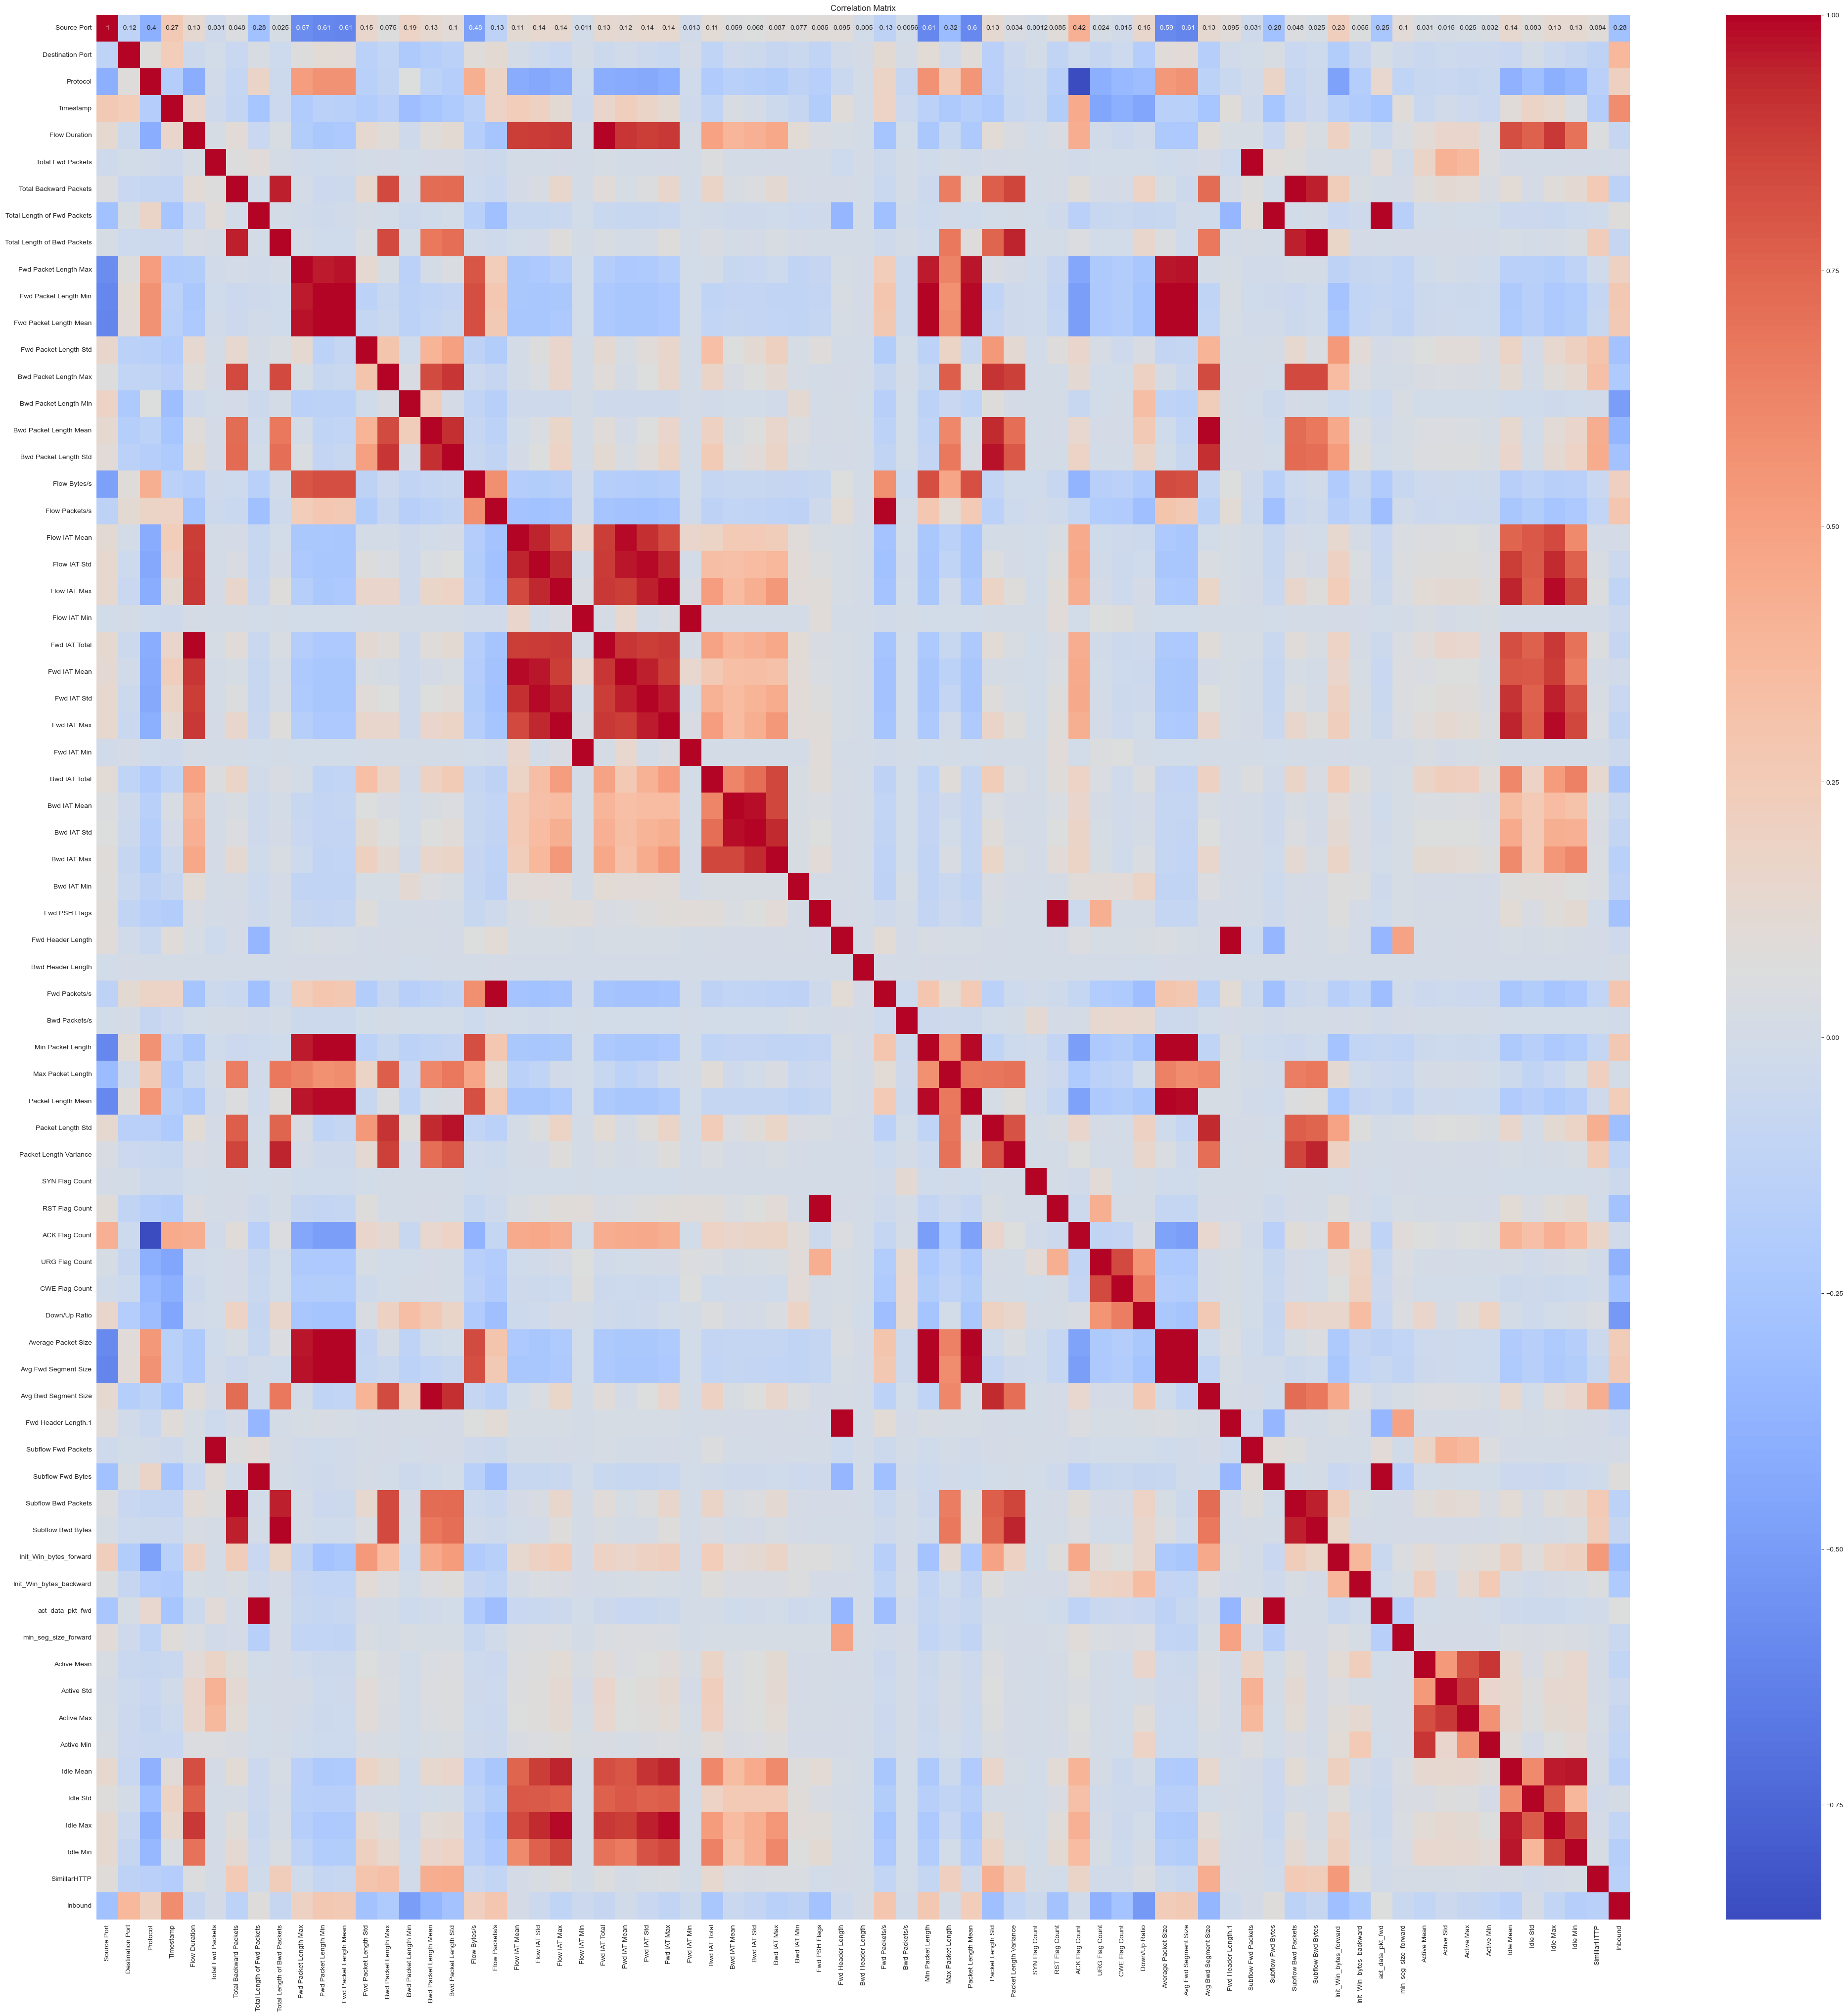

In [36]:
correction_matrix = copy_ddos_df.corr() 

plt.figure(figsize=(50, 50))
sns.heatmap(correction_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [37]:
import numpy as np

# Convert all values in the correction matrix to absolute values
correction_matrix = correction_matrix.abs()

# Create the upper triangle of the correction matrix
upper_triangle = correction_matrix.where(np.triu(np.ones(correction_matrix.shape), k=1).astype(bool))

# Identify columns with correlation greater than 0.80 to drop
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

# Print the results
print("Columns to drop:", to_drop)
print(f"Size of columns to drop: {len(to_drop)} out of {correction_matrix.shape[1]}")


Columns to drop: ['Total Length of Bwd Packets', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd Packets/s', 'Min Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'RST Flag Count', 'ACK Flag Count', 'CWE Flag Count', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'act_data_pkt_fwd', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Max', 'Idle Min']
Size of columns to drop: 39 out of 71


New shape: (64239, 32)


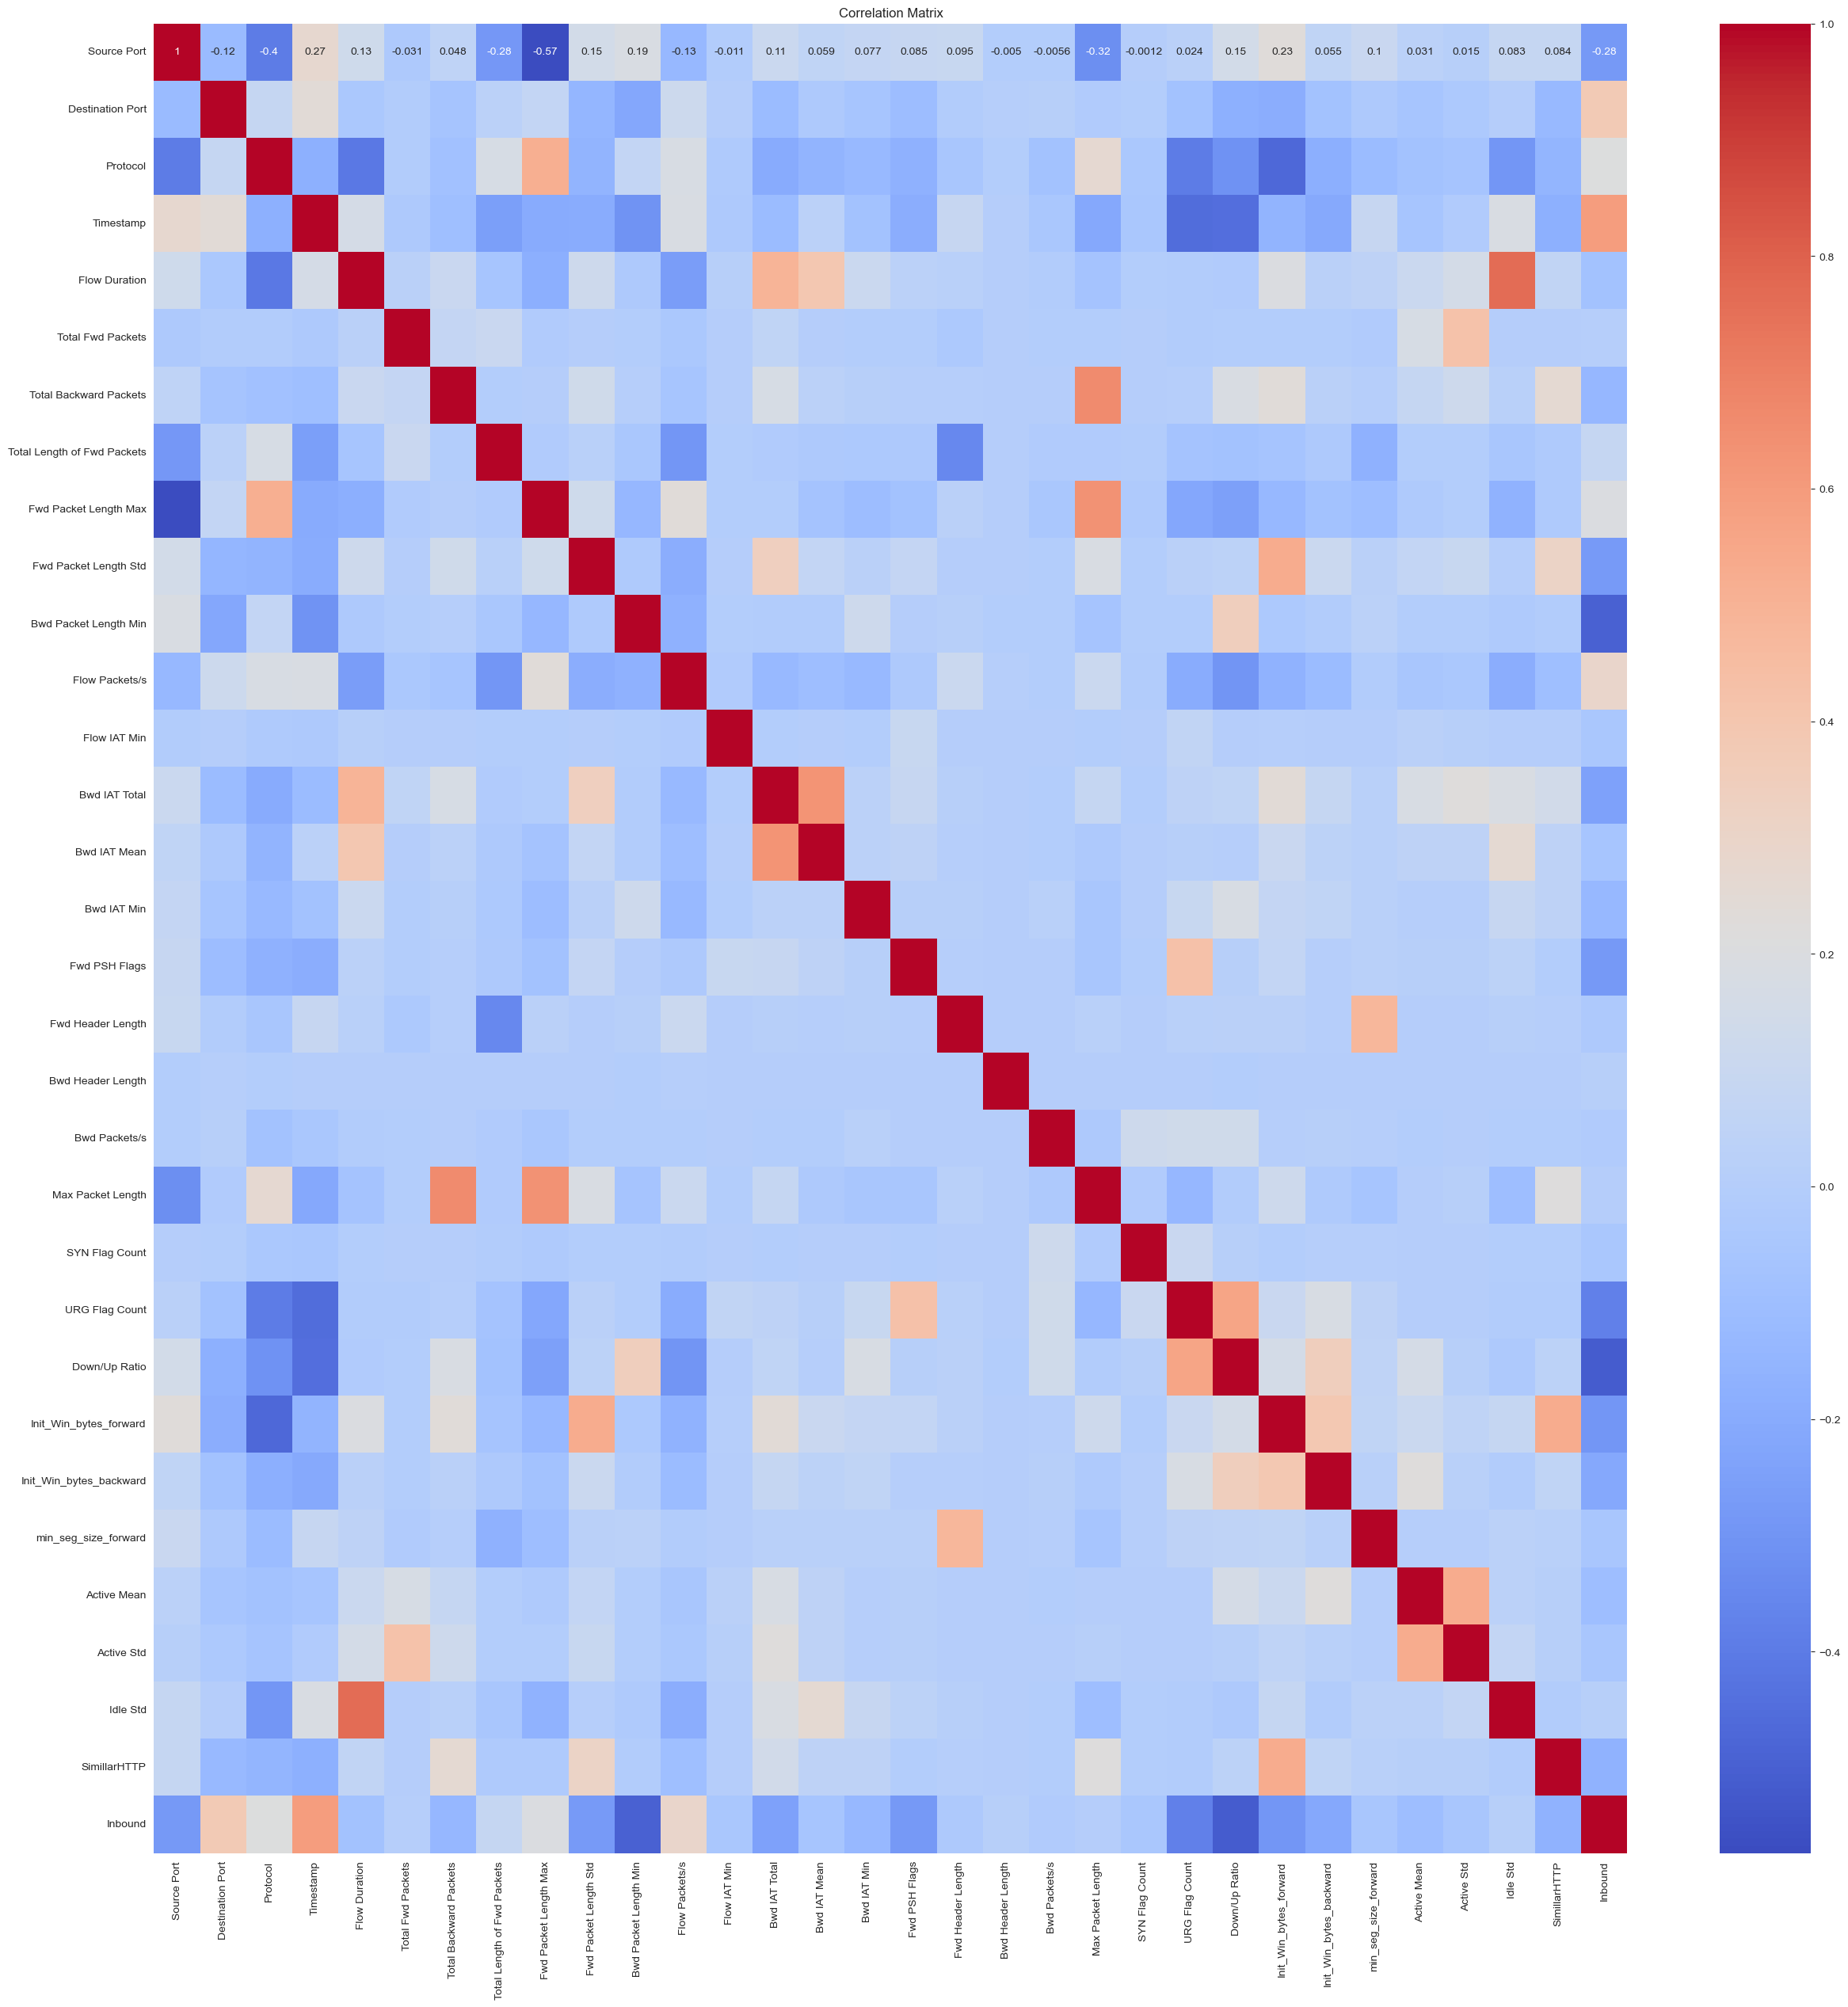

In [38]:
new_ddos_df = copy_ddos_df.drop(columns=to_drop)    
print("New shape:", new_ddos_df.shape)

correction_matrix = new_ddos_df.corr()  

plt.figure(figsize=(30, 30))
sns.heatmap(correction_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [39]:
new_feature_group_outliers = feature_group_outliers[feature_group_outliers['feature'].isin(new_ddos_df.columns)]
new_feature_group_outliers = new_feature_group_outliers.sort_values(by='outliers_percentage_mean', ascending=False).reset_index(drop=True) 
new_feature_group_outliers.drop(columns=['outliers_mean_dist'], inplace=True)   
new_feature_group_outliers

feature  outliers_mean  outliers_percentage_mean
0                  Flow IAT Min     749.250000                 13.360559
1             Fwd Header Length     691.500000                 12.491285
2   Total Length of Fwd Packets     583.250000                 11.200896
3             Max Packet Length     532.583333                 10.442175
4          min_seg_size_forward     548.333333                  9.868519
5                 Flow Duration     531.250000                  9.711402
6         Fwd Packet Length Max     522.166667                  9.064217
7                   Source Port     460.500000                  8.362985
8                Flow Packets/s     360.750000                  6.544217
9        Total Backward Packets     306.500000                  6.509771
10            Total Fwd Packets     320.416667                  6.276242
11                Bwd IAT Total     232.083333                  5.759269
12                 Bwd IAT Mean     231.833333                  5.747871
13        Fwd Packet Length Std     178.500000                  4.945501
14            Bwd Header Length     242.916667                  4.820538
15      Init_Win_bytes_backward     174.083333                  3.661997
16                Bwd Packets/s     181.750000                  3.422936
17                  Active Mean     168.083333                  3.220047
18                Down/Up Ratio     116.333333                  2.136858
19                      Inbound     112.416667                  2.006762
20                 SimillarHTTP      39.833333                  1.940632
21             Destination Port      89.583333                  1.583304
22       Init_Win_bytes_forward      84.833333                  1.510674
23                  Bwd IAT Min      71.333333                  1.390227
24                   Active Std      61.833333                  1.110032
25                     Idle Std      56.166667                  1.006339
26                Fwd PSH Flags      48.916667                  0.927619
27        Bwd Packet Length Min      23.833333                  0.421232
28                     Protocol      14.583333                  0.359806
29               URG Flag Count       7.916667                  0.146690
30               SYN Flag Count       3.166667                  0.063201

In [40]:
# selecting 3 features with highest mean outliers percentage
new_top_features = new_feature_group_outliers.head(3)['feature'].values 
print("Features with highest mean outliers percentage:", new_top_features)  

#selecting with lowest mean outliers percentage 
new_bottom_features = new_feature_group_outliers.tail(3)['feature'].values      
print("Features with lowest mean outliers percentage:", new_bottom_features)

mean_outliers = new_feature_group_outliers['outliers_percentage_mean'].mean()     
print("Mean Outliers Count:", mean_outliers)     

new_feature_group_outliers['outliers_mean_dist'] = (new_feature_group_outliers['outliers_percentage_mean'] - mean_outliers).abs()
new_feature_group_outliers = new_feature_group_outliers.sort_values(by='outliers_mean_dist', ascending=True)       



# selecting 3 features with nearest mean outliers count to the overall mean 
new_near_mean_features = new_feature_group_outliers.head(3)['feature'].values
print("Features with nearest mean outliers distance:", new_near_mean_features)


Features with highest mean outliers percentage: ['Flow IAT Min' 'Fwd Header Length' 'Total Length of Fwd Packets']
Features with lowest mean outliers percentage: ['Protocol' 'URG Flag Count' 'SYN Flag Count']
Mean Outliers Count: 4.839154949069643
Features with nearest mean outliers distance: ['Bwd Header Length' 'Fwd Packet Length Std' 'Bwd IAT Mean']


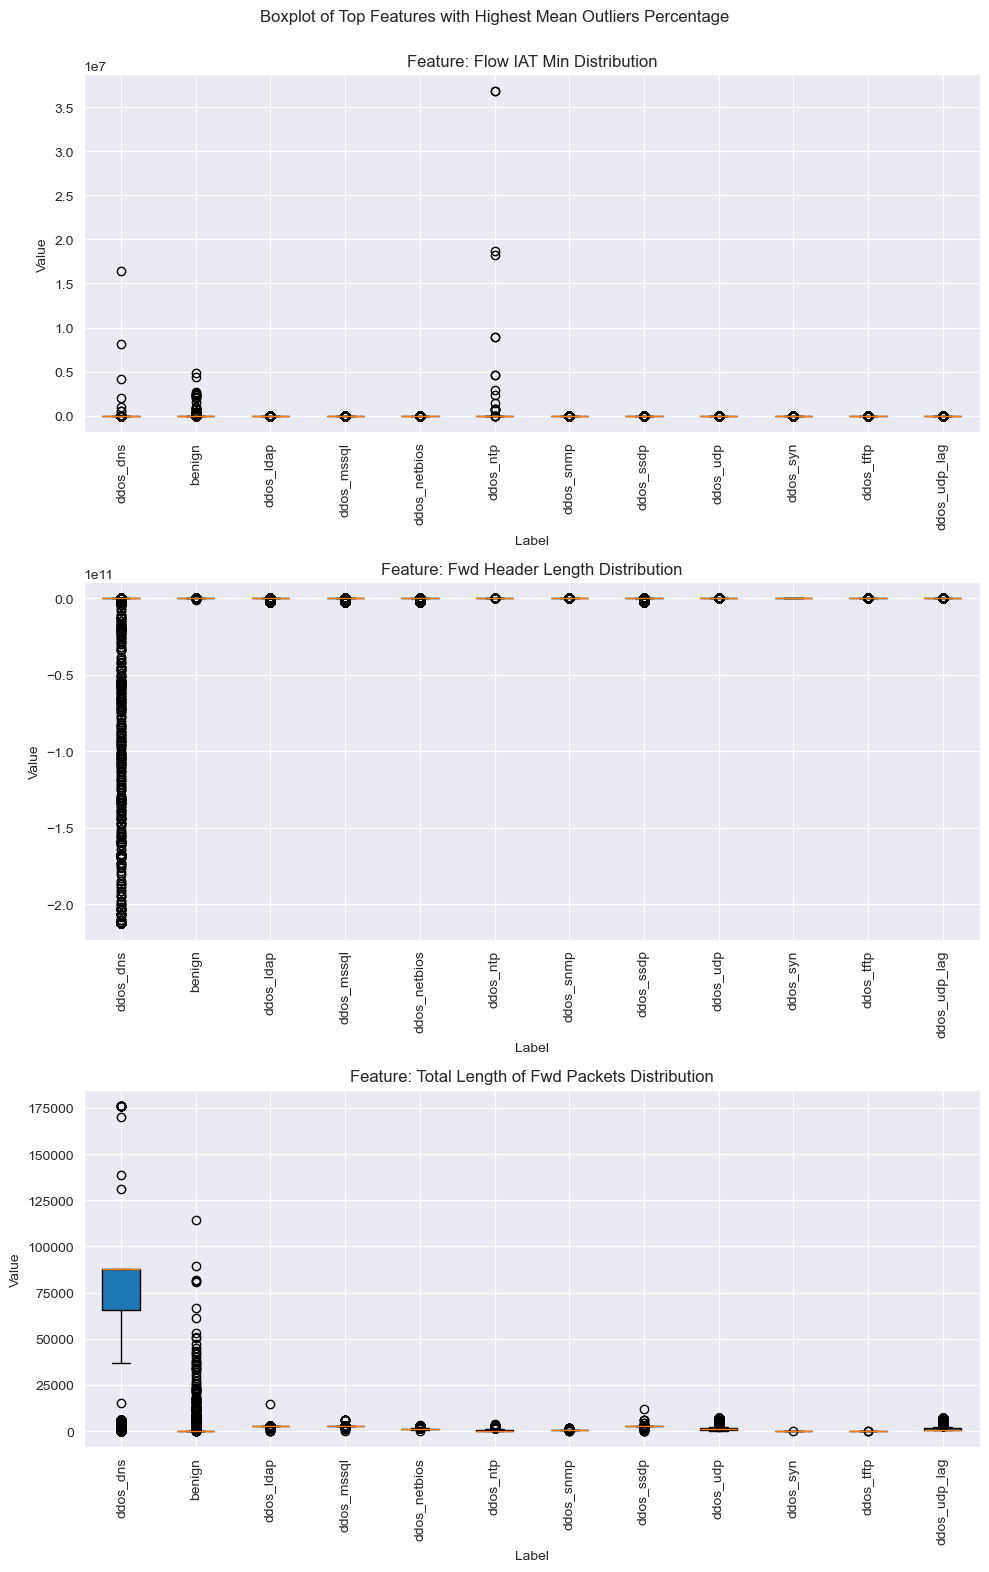

In [41]:
fig, ax = plt.subplots(len(new_top_features), 1, figsize=(10, 16))
fig.suptitle("Boxplot of Top Features with Highest Mean Outliers Percentage")
for i, feature in enumerate(new_top_features):
    data_to_plot = [
        ddos_df[ddos_df["label"] == label][feature].values for label in unique_labels
    ]
    ax[i].boxplot(data_to_plot, patch_artist=True)  
    ax[i].set_title(f"Feature: {feature} Distribution")
    ax[i].set_xlabel("Label")
    ax[i].set_ylabel("Value")
    ax[i].set_xticklabels(unique_labels)    
    ax[i].tick_params(axis='x', rotation=90) 

plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()  

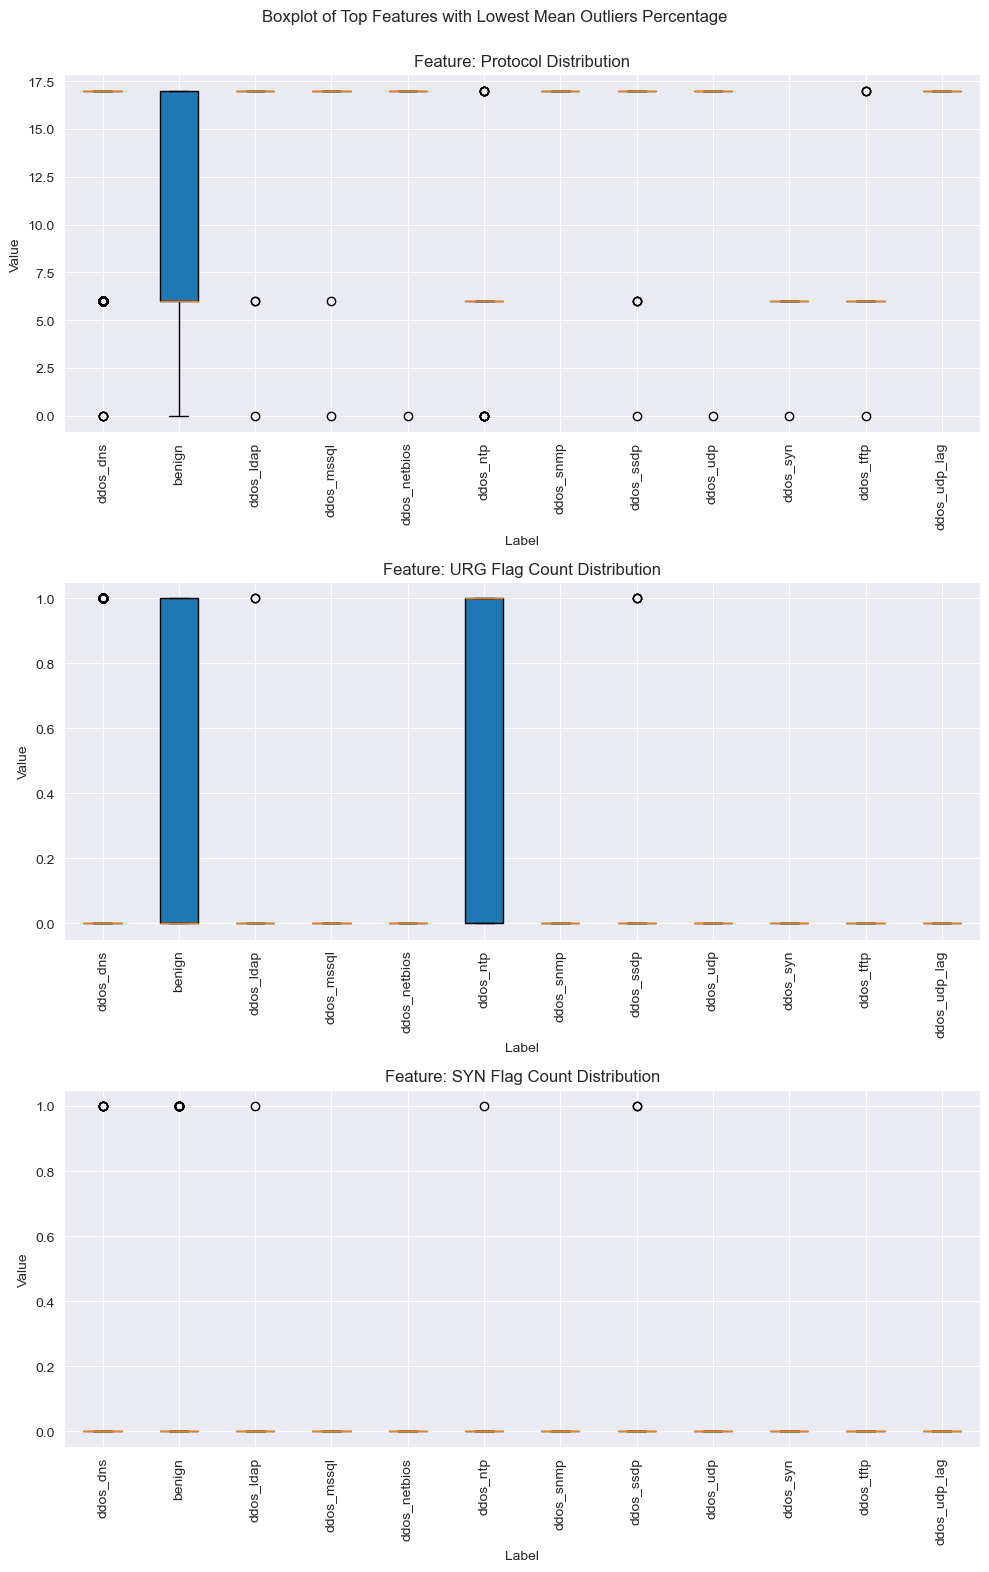

In [42]:
fig, ax = plt.subplots(len(new_bottom_features), 1, figsize=(10, 16))
fig.suptitle("Boxplot of Top Features with Lowest Mean Outliers Percentage")
for i, feature in enumerate(new_bottom_features):
    data_to_plot = [
        ddos_df[ddos_df["label"] == label][feature].values for label in unique_labels
    ]
    ax[i].boxplot(data_to_plot, patch_artist=True)  
    ax[i].set_title(f"Feature: {feature} Distribution")
    ax[i].set_xlabel("Label")
    ax[i].set_ylabel("Value")
    ax[i].set_xticklabels(unique_labels)    
    ax[i].tick_params(axis='x', rotation=90) 

plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()  

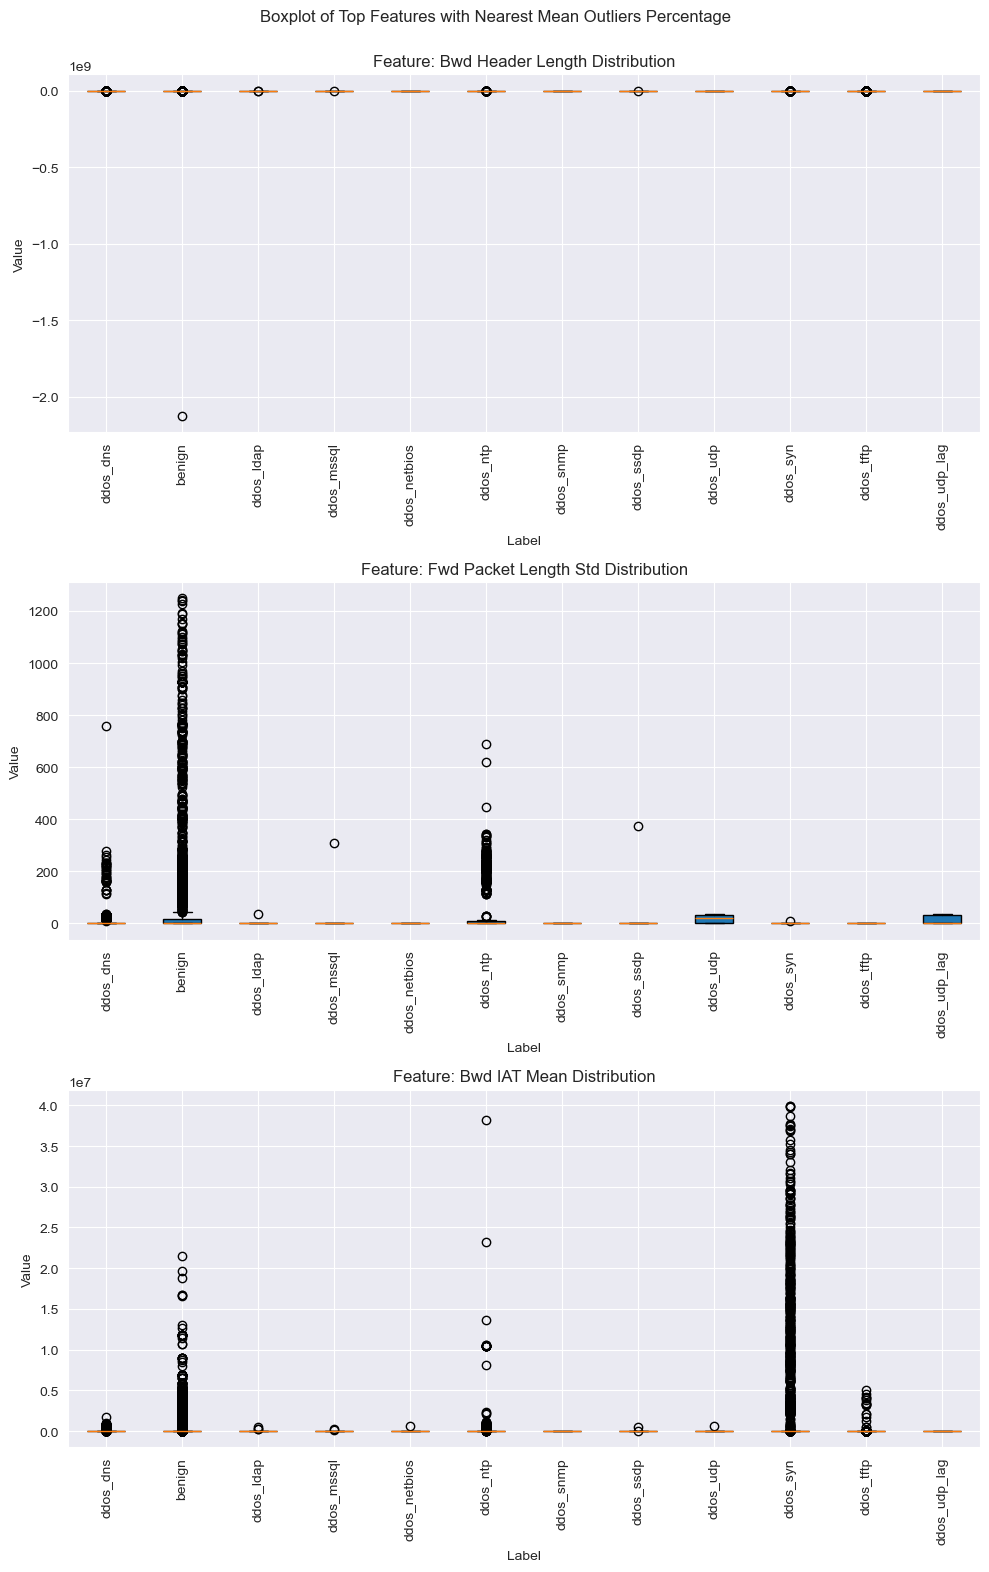

In [43]:
fig, ax = plt.subplots(len(new_near_mean_features), 1, figsize=(10, 16))
fig.suptitle("Boxplot of Top Features with Nearest Mean Outliers Percentage")
for i, feature in enumerate(new_near_mean_features):
    data_to_plot = [
        ddos_df[ddos_df["label"] == label][feature].values for label in unique_labels
    ]
    ax[i].boxplot(data_to_plot, patch_artist=True)  
    ax[i].set_title(f"Feature: {feature} Distribution")
    ax[i].set_xlabel("Label")
    ax[i].set_ylabel("Value")
    ax[i].set_xticklabels(unique_labels)    
    ax[i].tick_params(axis='x', rotation=90) 

plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()  

### PCA

In [44]:
print("New shape:", new_ddos_df.shape)  
new_ddos_df

New shape: (64239, 32)


Source Port  Destination Port  Protocol     Timestamp  Flow Duration  \
0              634             60495        17   5668.629638          28415   
1              634             60495        17   5668.637032              2   
2              634             46391        17   5668.668689          48549   
3              634             11894        17   5668.706403          48337   
4              634             27878        17   5668.757341          32026   
...            ...               ...       ...           ...            ...   
64234        38625             63051        17  13655.444439              1   
64235        58632             18963        17  13655.445153         212238   
64236        46104             64704        17  13655.445204              1   
64237        60686             10440        17  13655.445206         108952   
64238        45602              1387        17  13655.445490              1   

       Total Fwd Packets  Total Backward Packets  Total Length of Fwd Packets  \
0                     97                       0                      42680.0   
1                      2                       0                        880.0   
2                    200                       0                      88000.0   
3                    200                       0                      88000.0   
4                    200                       0                      88000.0   
...                  ...                     ...                          ...   
64234                  2                       0                        750.0   
64235                  6                       0                       2088.0   
64236                  2                       0                        750.0   
64237                  4                       0                       1438.0   
64238                  2                       0                        750.0   

       Fwd Packet Length Max  Fwd Packet Length Std  ...  URG Flag Count  \
0                      440.0               0.000000  ...               0   
1                      440.0               0.000000  ...               0   
2                      440.0               0.000000  ...               0   
3                      440.0               0.000000  ...               0   
4                      440.0               0.000000  ...               0   
...                      ...                    ...  ...             ...   
64234                  375.0               0.000000  ...               0   
64235                  393.0              35.088460  ...               0   
64236                  375.0               0.000000  ...               0   
64237                  389.0              34.063666  ...               0   
64238                  375.0               0.000000  ...               0   

       Down/Up Ratio  Init_Win_bytes_forward  Init_Win_bytes_backward  \
0                0.0                      -1                       -1   
1                0.0                      -1                       -1   
2                0.0                      -1                       -1   
3                0.0                      -1                       -1   
4                0.0                      -1                       -1   
...              ...                     ...                      ...   
64234            0.0                      -1                       -1   
64235            0.0                      -1                       -1   
64236            0.0                      -1                       -1   
64237            0.0                      -1                       -1   
64238            0.0                      -1                       -1   

       min_seg_size_forward  Active Mean  Active Std  Idle Std  SimillarHTTP  \
0                        -1          0.0         0.0       0.0             0   
1                        -1          0.0         0.0       0.0             0   
2                        -1          0.0         0.0   

Cumulative explained variance percentage: [ 13.15273233  22.03361554  29.97812472  35.98934445  41.24999424
  46.12059692  50.71173235  54.69815022  58.38489676  61.85218546
  65.25597374  68.38035849  71.4570543   74.45781484  77.32498057
  80.04409078  82.53639183  84.9281748   87.13346532  89.19523478
  90.90455854  92.36424991  93.69140857  94.90248284  95.94515634
  96.86349939  97.71380824  98.38211656  98.97842785  99.42468491
  99.75681204 100.        ]
Number of components to keep: 12


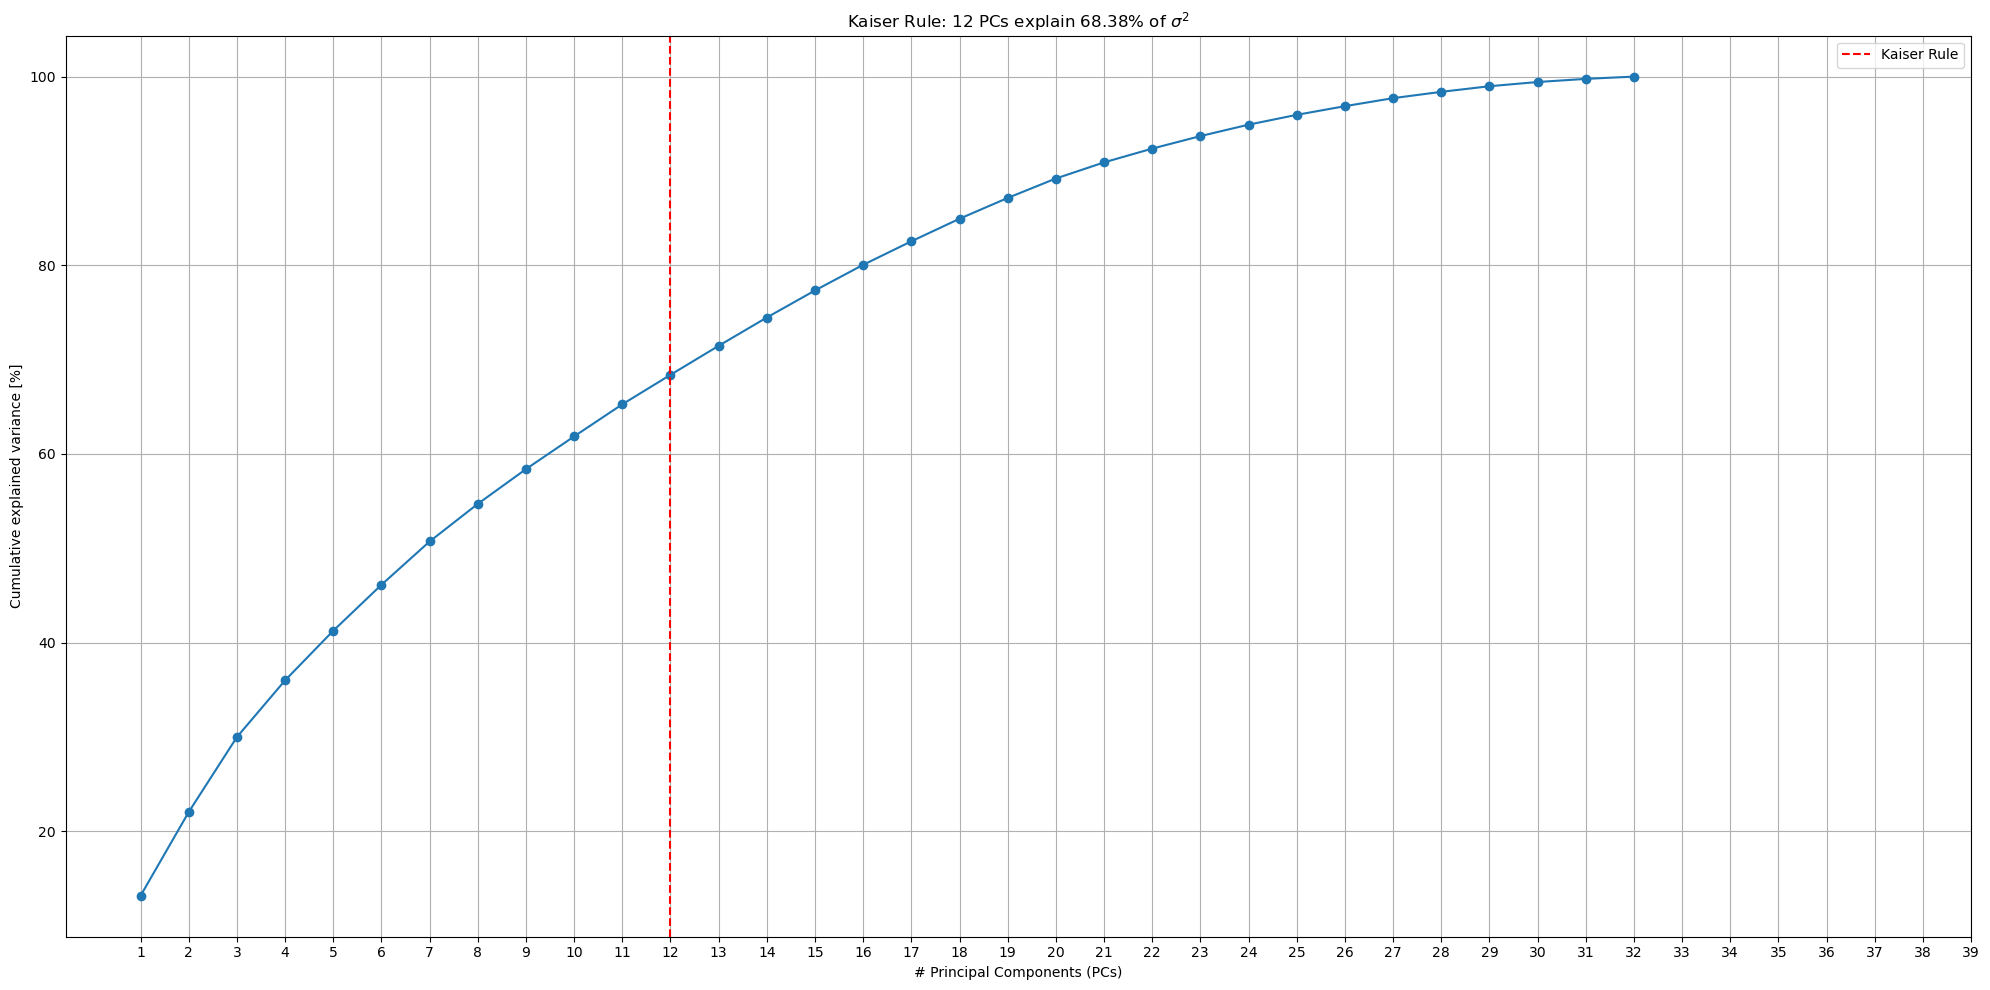

In [45]:
scale = StandardScaler()
scaled_data = scale.fit_transform(new_ddos_df)
pca = PCA()
pca = pca.fit(scaled_data)

# Using Kaiser's rule to determine the number of components to keep 
cum_variance_percentage = np.cumsum(pca.explained_variance_ratio_) * 100
print("Cumulative explained variance percentage:", cum_variance_percentage)
nr_components = np.sum(pca.explained_variance_ > 1) + 1     
print("Number of components to keep:", nr_components)

plt.rcdefaults()
plt.figure(figsize=(20, 10))
plt.plot(cum_variance_percentage, marker='o')
plt.title(f'Kaiser Rule: {nr_components} PCs explain {round(cum_variance_percentage[nr_components - 1], 2)}% of $\sigma^2$')
plt.axvline(x=nr_components - 1, color='red', linestyle='--', label='Kaiser Rule')
plt.xlabel('# Principal Components (PCs)')
plt.xticks([i for i in range(39)], [i for i in range(1,40)])
plt.ylabel('Cumulative explained variance [%]')
plt.grid()


plt.legend()

plt.tight_layout()
plt.show()  

In [46]:
nr_pca_components = 12 
pca = PCA(n_components=nr_pca_components, random_state=22)
pca_data = pca.fit_transform(scaled_data)   

pca_ddos_df = pd.DataFrame(data=pca_data, columns=[f"PC{i}" for i in range(1, nr_pca_components + 1)])   
pca_ddos_df['label'] = ddos_df['label'].values
pca_ddos_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -0.767386  0.629718 -0.086136  1.475952 -0.382813  0.219975 -0.287386   
1      0.346331  1.123102 -0.671292  0.243420  0.120493 -0.799205  0.233395   
2     -0.751665  1.024190 -0.030614  2.454446 -0.735167  0.666797 -0.069239   
3     -0.451056  1.236168 -0.092634  2.396780 -0.755072  0.584272  0.386840   
4     -0.591036  1.138132 -0.064011  2.422771 -0.745383  0.622504  0.175197   
...         ...       ...       ...       ...       ...       ...       ...   
64234 -1.164736 -1.014207 -0.181570 -0.617315  0.418607  0.281312 -0.173706   
64235  0.029140 -0.806287 -0.265024 -0.351898 -0.055171  0.609014  0.918321   
64236 -1.113647 -1.099726 -0.220968 -0.677177  0.425967  0.346952 -0.119279   
64237  0.119574 -0.783789 -0.302882 -0.395010 -0.050788  0.598265  1.051704   
64238 -0.566281 -0.705594 -0.331956 -0.778800  0.388992  0.191340  0.712709   

            PC8       PC9      PC10      PC11      PC12         label  
0      0.381667 -0.702968  1.365470  0.753292  0.028104      ddos_dns  
1     -0.287955 -0.169539  0.130413  0.062145 -0.050297      ddos_dns  
2      0.265940 -0.806283  2.030039  1.318376  0.047502      ddos_dns  
3     -0.071648 -0.699958  1.959789  1.407830  0.040673      ddos_dns  
4      0.084300 -0.748981  1.991451  1.366030  0.043812      ddos_dns  
...         ...       ...       ...       ...       ...           ...  
64234  0.015404  0.158411 -0.431874 -0.185380 -0.000038  ddos_udp_lag  
64235 -0.331497  0.152300  0.168984  0.424344  0.007266  ddos_udp_lag  
64236  0.003320  0.214402 -0.483797 -0.192047 -0.002689  ddos_udp_lag  
64237 -0.418499  0.199221  0.124498  0.435009  0.004370  ddos_udp_lag  
64238 -0.614397  0.405450 -0.609009 -0.027695 -0.015024  ddos_udp_lag  

[64239 rows x 13 columns]

In [47]:
loadings = pca.components_

# Display top features for each principal component
for i in range(nr_components):
    pc_loadings = pd.DataFrame(loadings[i], index=new_ddos_df.columns, columns=[f'PC{i}_Loading'])
    pc_loadings_sorted = pc_loadings.abs().sort_values(by=f'PC{i}_Loading', ascending=False)

    print(f"Top 5 features for PC{i}:")
    print(pc_loadings_sorted.head())
    print("\n" + "="*40 + "\n")

Top 5 features for PC0:
                        PC0_Loading
Inbound                    0.344373
Protocol                   0.313331
Init_Win_bytes_forward     0.294313
Down/Up Ratio              0.290117
URG Flag Count             0.241706


Top 5 features for PC1:
                       PC1_Loading
Timestamp                 0.453969
Max Packet Length         0.345709
Idle Std                  0.308145
Fwd Packet Length Max     0.305355
Flow Duration             0.303764


Top 5 features for PC2:
                        PC2_Loading
Max Packet Length          0.362901
Bwd IAT Total              0.325964
Fwd Packet Length Max      0.276489
Flow Duration              0.273136
Total Backward Packets     0.265493


Top 5 features for PC3:
                             PC3_Loading
Total Length of Fwd Packets     0.431991
Fwd Header Length               0.413545
min_seg_size_forward            0.323765
Flow Packets/s                  0.257404
Init_Win_bytes_forward          0.231709


Top 5 fe

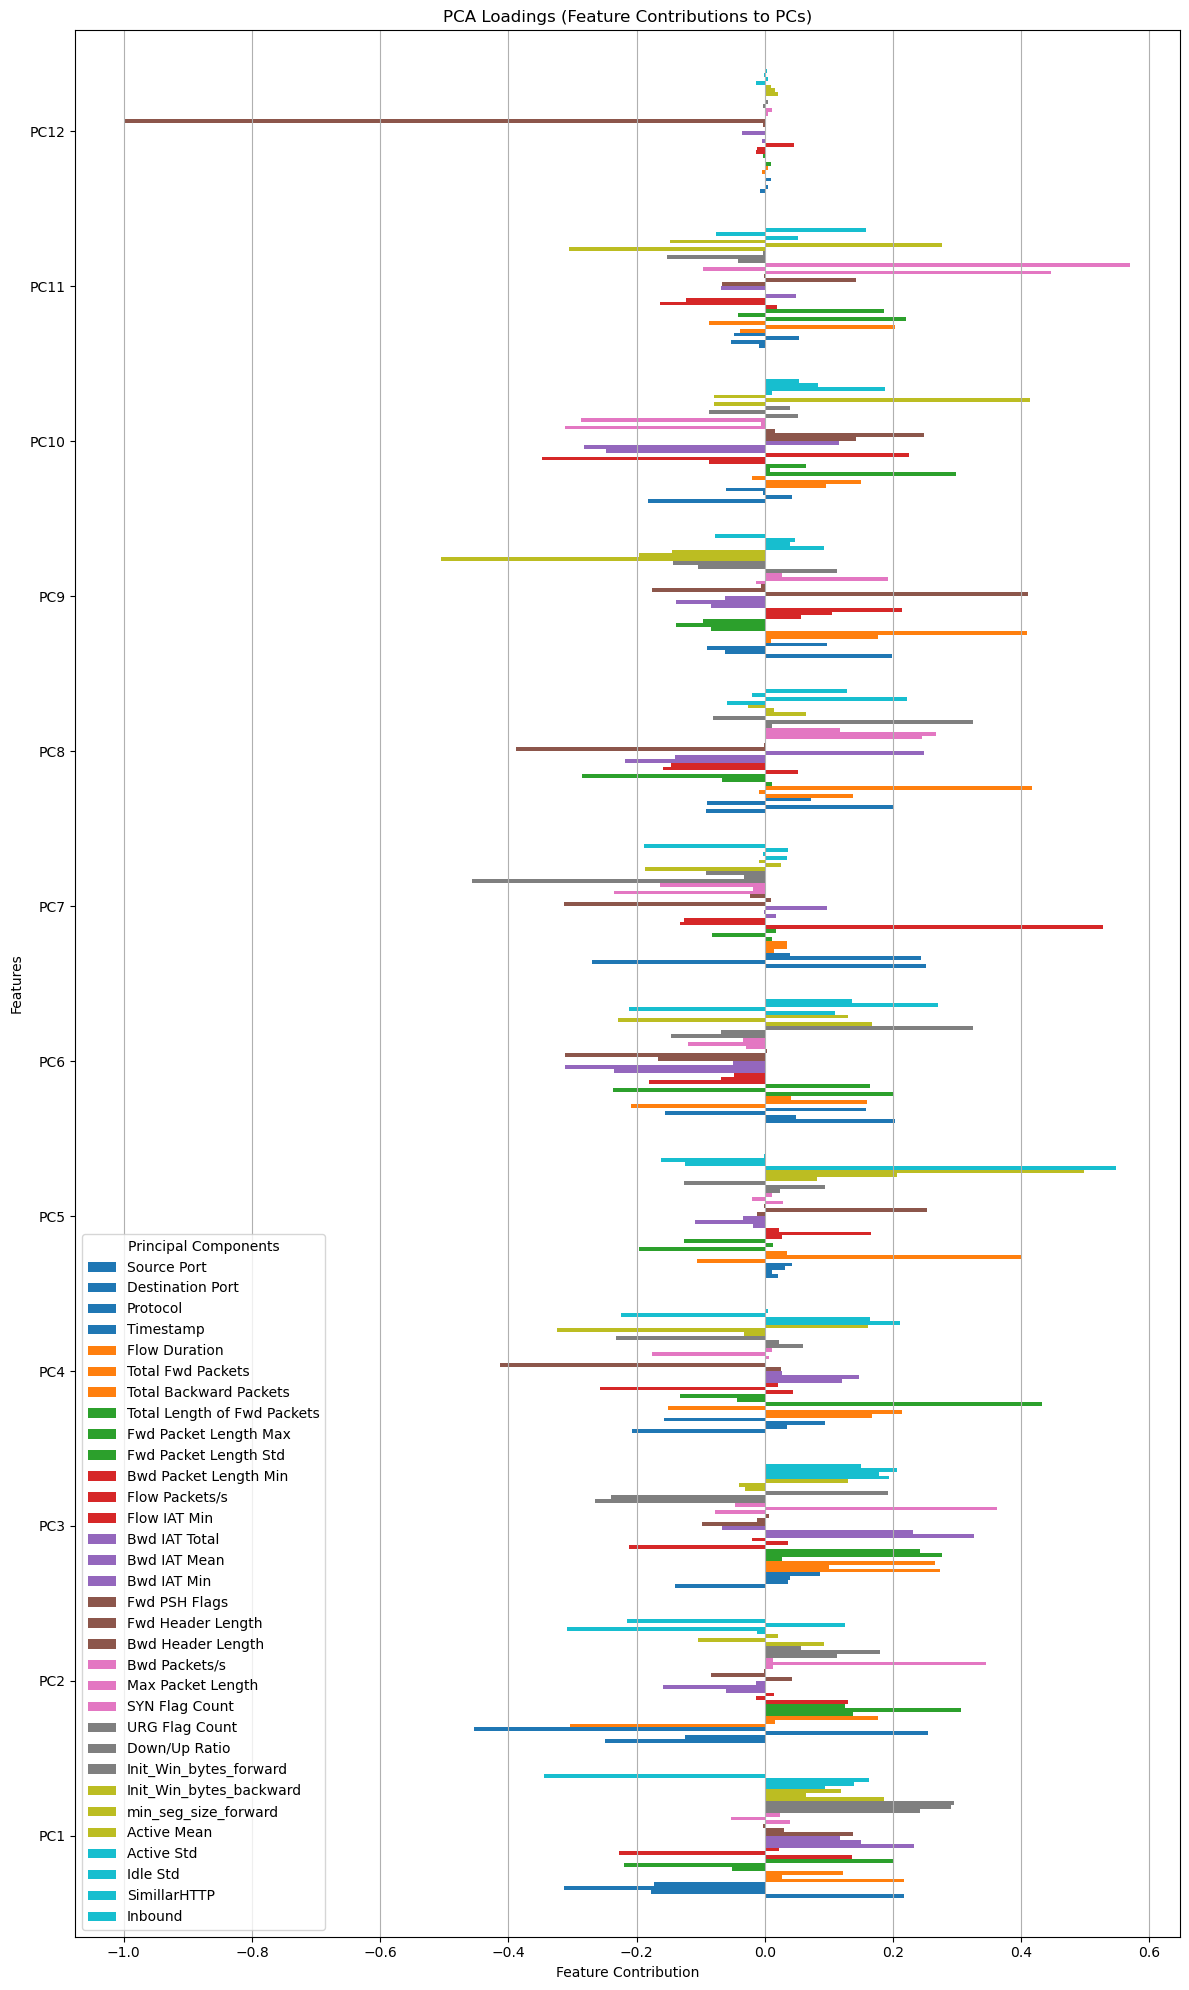

In [48]:
loadings = pd.DataFrame(loadings, columns=new_ddos_df.columns, index=[f"PC{i}" for i in range(1, nr_pca_components + 1)])   


loadings.plot(kind='barh', figsize=(12, 20), width=0.8, cmap='tab10')
plt.title("PCA Loadings (Feature Contributions to PCs)")
plt.xlabel("Feature Contribution")
plt.ylabel("Features")
plt.legend(title="Principal Components")
plt.grid(axis='x')  
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

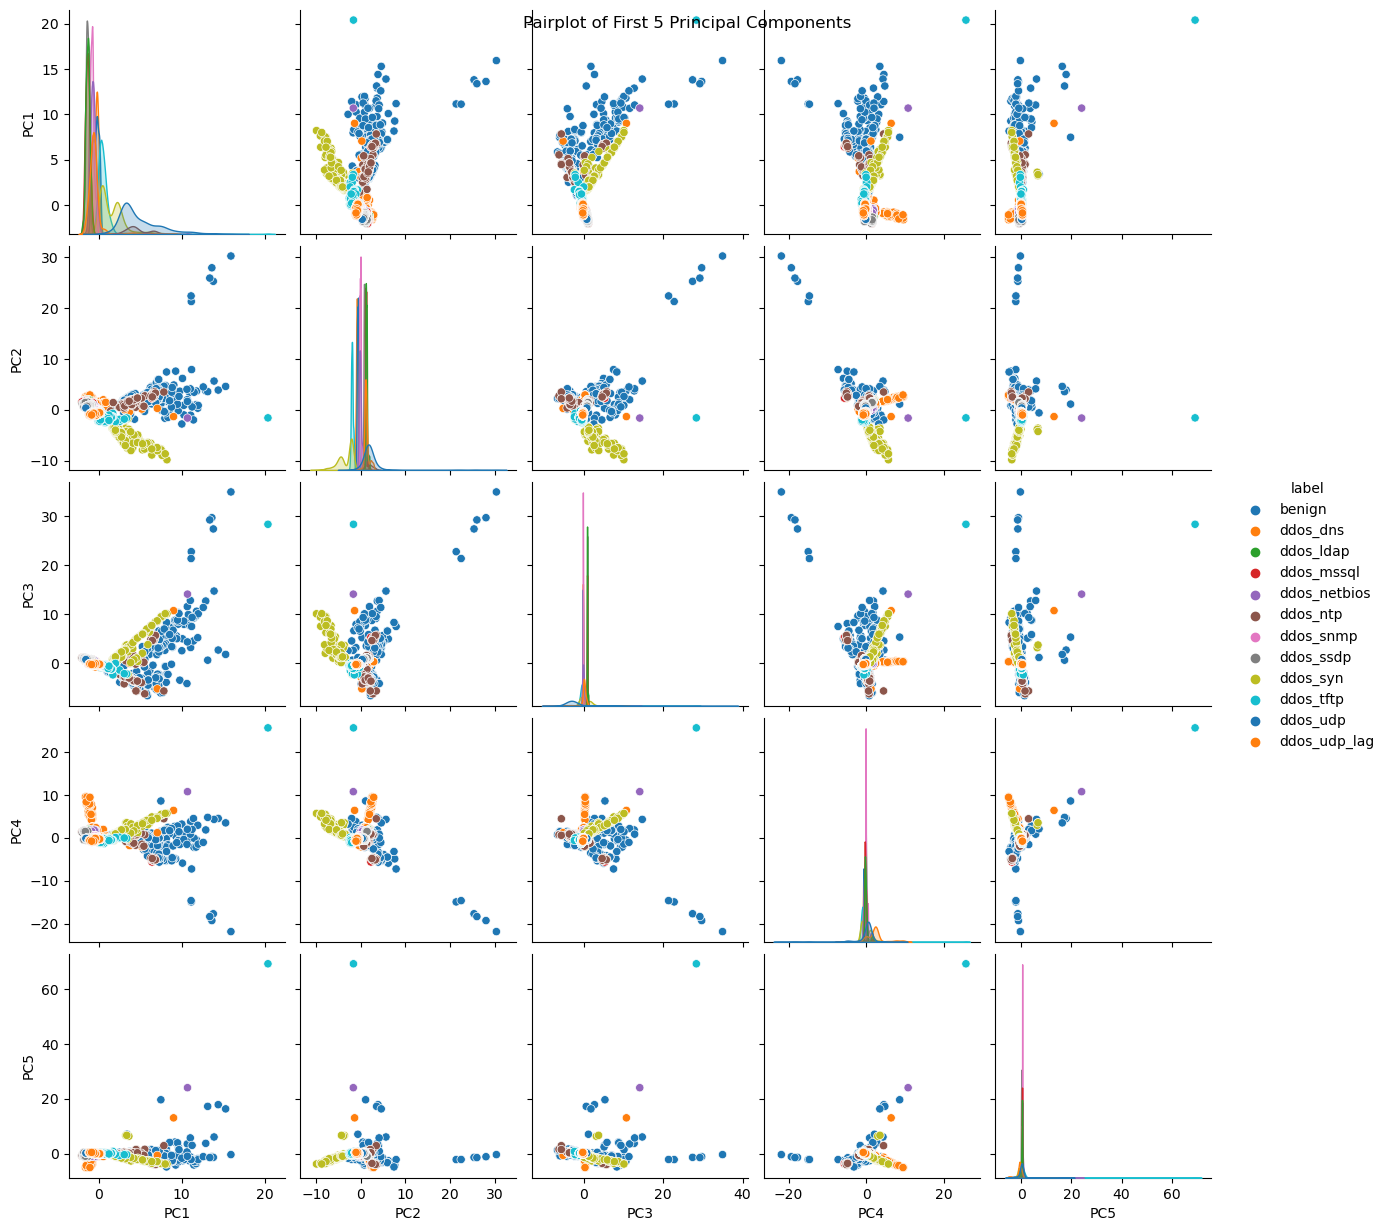

In [49]:
nr_pca_for_plot = 5
data_for_plot = pca_ddos_df.iloc[:, 0:nr_pca_for_plot].copy()   

data_for_plot["label"] = pca_ddos_df["label"].values

samples = []
for label, group in data_for_plot.groupby('label'):
    samples.append(group.sample(frac=0.1, random_state=42)) 

sample_data =  pd.concat(samples).reset_index(drop=True)            

g = sns.pairplot(sample_data, hue="label", palette="tab10")

g.figure.suptitle("Pairplot of First 5 Principal Components")  
# g.figure.set_size_inches(50, 50)
plt.show()

### Section 2


In [50]:
y = df_label['intLabel']
X, X_test, y, y_test = train_test_split(new_ddos_df, y, stratify=y, train_size=0.7, random_state=15)


X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    stratify = y, 
    train_size = 0.5/0.7, 
    random_state = 15
)


## Choosing 3 ML methods
For supervised learning, the 3 following algorithms have been chosen:
- Random Forest
- K-Nearest Neighbor
- SVM 

### Random Forest

In [51]:
# Initialize the Random Forest Classifier
random_forest_classifier = RandomForestClassifier()

# Train the classifier on the training set
random_forest_classifier.fit(X_train, y_train)

# Predict on the training set
train_predictions_rf = random_forest_classifier.predict(X_train)

# Predict on the validation set
validation_predictions_rf = random_forest_classifier.predict(X_val)


## Classification Report (Confusion matrix , Precision , F1-Score)

Classification Report - Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2829
           1       1.00      1.00      1.00      2684
           2       1.00      1.00      1.00      2963
           3       1.00      1.00      1.00      2956
           4       1.00      1.00      1.00      2915
           5       1.00      1.00      1.00       493
           6       1.00      1.00      1.00      2992
           7       1.00      1.00      1.00      2985
           8       1.00      1.00      1.00      2740
           9       1.00      1.00      1.00      2631
          10       1.00      1.00      1.00      2938
          11       1.00      1.00      1.00      2993

    accuracy                           1.00     32119
   macro avg       1.00      1.00      1.00     32119
weighted avg       1.00      1.00      1.00     32119


Classification Report - Validation Set
              precision    recall  f1-score   support

 

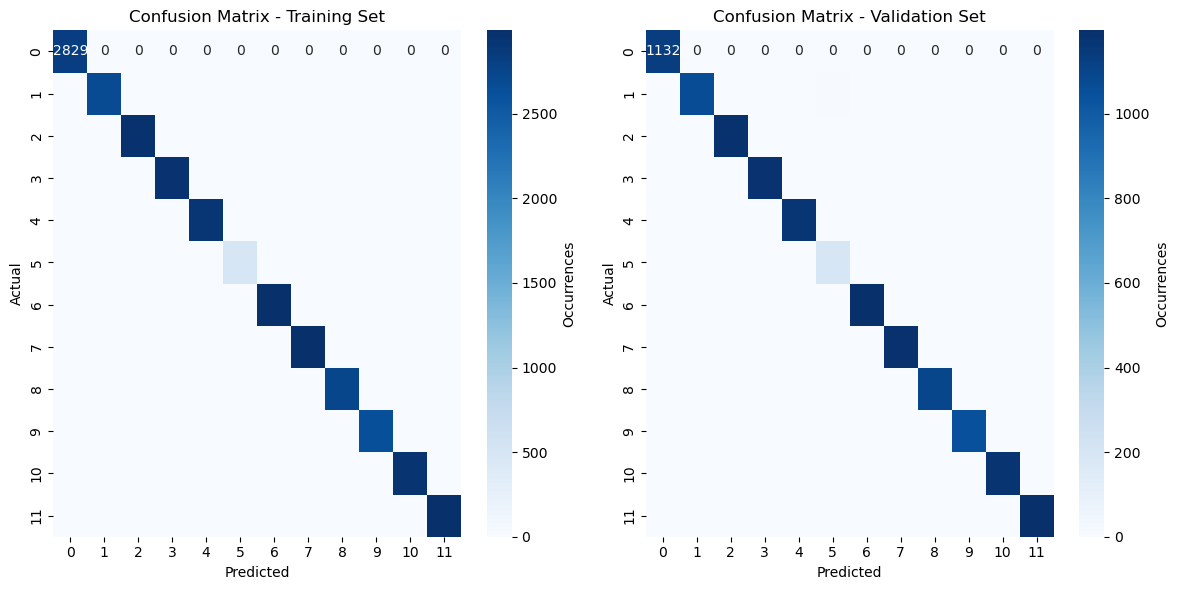

In [52]:
# Display classification reports for training and validation sets
print('Classification Report - Training Set')
print(classification_report(y_train, train_predictions_rf))
print('\nClassification Report - Validation Set')
print(classification_report(y_val, validation_predictions_rf))

# Create and visualize confusion matrices for training and validation sets
fig, (train_ax, val_ax) = plt.subplots(1, 2, figsize=(12, 6))

# Confusion matrix for training set
training_confusion_matrix = confusion_matrix(y_train, train_predictions_rf)
sns.heatmap(
    training_confusion_matrix, annot=True, cmap='Blues', fmt='d', ax=train_ax, 
    cbar_kws={'label': 'Occurrences'}
)
train_ax.set_title('Confusion Matrix - Training Set')
train_ax.set_xlabel('Predicted')
train_ax.set_ylabel('Actual')

# Confusion matrix for validation set
validation_confusion_matrix = confusion_matrix(y_val, validation_predictions_rf)
sns.heatmap(
    validation_confusion_matrix, annot=True, cmap='Blues', fmt='d', ax=val_ax, 
    cbar_kws={'label': 'Occurrences'}
)
val_ax.set_title('Confusion Matrix - Validation Set')
val_ax.set_xlabel('Predicted')
val_ax.set_ylabel('Actual')

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


## K-Nearest Neighbour 

In [53]:
# Initialize the K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier on the training set
knn_classifier.fit(X_train, y_train)

# Predict on the training set
train_predictions_knn = knn_classifier.predict(X_train)

# Predict on the validation set
validation_predictions_knn = knn_classifier.predict(X_val)


## Classification Report (Confusion matrix , Precision , F1-Score)

Classification Report - Training Set
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2829
           1       0.98      0.94      0.96      2684
           2       0.93      0.96      0.94      2963
           3       0.95      0.95      0.95      2956
           4       0.99      0.99      0.99      2915
           5       0.87      0.85      0.86       493
           6       0.99      0.99      0.99      2992
           7       0.99      0.98      0.99      2985
           8       0.98      0.98      0.98      2740
           9       0.97      0.98      0.98      2631
          10       0.92      0.91      0.92      2938
          11       0.92      0.92      0.92      2993

    accuracy                           0.96     32119
   macro avg       0.96      0.95      0.95     32119
weighted avg       0.96      0.96      0.96     32119


Classification Report - Validation Set
              precision    recall  f1-score   support

 

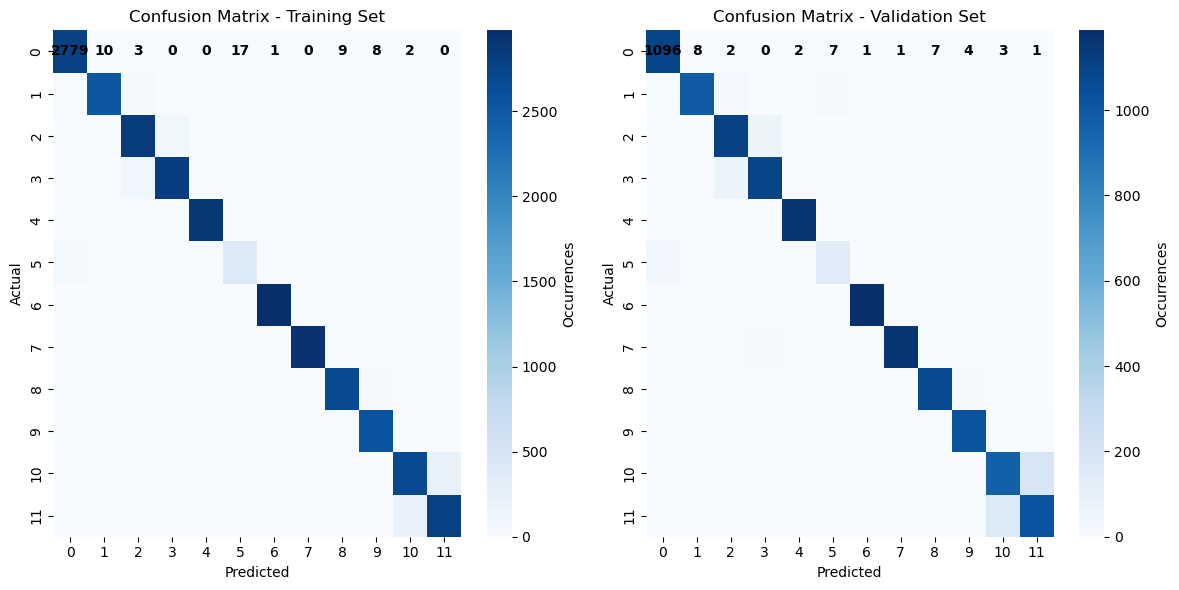

In [54]:
# Display classification reports for training and validation sets
print('Classification Report - Training Set')
print(classification_report(y_train, train_predictions_knn))
print('\nClassification Report - Validation Set')
print(classification_report(y_val, validation_predictions_knn))

# Create and visualize confusion matrices for training and validation sets
fig, (train_ax, val_ax) = plt.subplots(1, 2, figsize=(12, 6))

# Confusion matrix for training set
training_confusion_matrix = confusion_matrix(y_train, train_predictions_knn)
sns.heatmap(
    training_confusion_matrix, annot=True, cmap='Blues', fmt='d', ax=train_ax, 
    cbar_kws={'label': 'Occurrences'}, annot_kws={"size": 10, "color": "black", "weight": "bold"}
)
train_ax.set_title('Confusion Matrix - Training Set', fontsize=12)
train_ax.set_xlabel('Predicted', fontsize=10)
train_ax.set_ylabel('Actual', fontsize=10)

# Confusion matrix for validation set
validation_confusion_matrix = confusion_matrix(y_val, validation_predictions_knn)
sns.heatmap(
    validation_confusion_matrix, annot=True, cmap='Blues', fmt='d', ax=val_ax, 
    cbar_kws={'label': 'Occurrences'}, annot_kws={"size": 10, "color": "black", "weight": "bold"}
)
val_ax.set_title('Confusion Matrix - Validation Set', fontsize=12)
val_ax.set_xlabel('Predicted', fontsize=10)
val_ax.set_ylabel('Actual', fontsize=10)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


SVC

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_train_predictions = svm_classifier.predict(X_train)
svm_val_predictions = svm_classifier.predict(X_val)


#### Classification Report (Confusion Matrix, precision, Recall, F1-score)

Training set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2829
           1       1.00      0.12      0.22      2684
           2       0.00      0.00      0.00      2963
           3       0.00      0.00      0.00      2956
           4       0.39      0.13      0.19      2915
           5       0.00      0.00      0.00       493
           6       0.00      0.00      0.00      2992
           7       0.00      0.00      0.00      2985
           8       0.00      0.00      0.00      2740
           9       0.00      0.00      0.00      2631
          10       0.00      0.00      0.00      2938
          11       0.10      1.00      0.18      2993

    accuracy                           0.12     32119
   macro avg       0.12      0.10      0.05     32119
weighted avg       0.13      0.12      0.05     32119

Validation set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

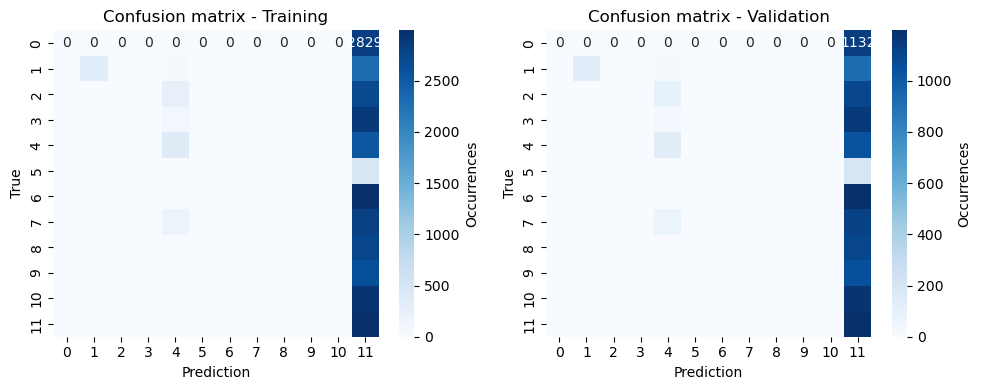

In [ ]:
# classification report
print('Training set')
print(classification_report(y_train, svm_train_predictions))
print('Validation set')
print(classification_report(y_val, svm_val_predictions))

# get the confusion matrix & visualize the confusion matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

confusion_train = confusion_matrix(y_train, svm_train_predictions)
sns.heatmap(confusion_train, cmap='Blues', annot=True, ax=ax1, cbar_kws={'label':'Occurrences'}, fmt='d')
ax1.set_xlabel('Prediction')
ax1.set_ylabel('True')
ax1.set_title('Confusion matrix - Training')

confusion_val = confusion_matrix(y_val, svm_val_predictions)
sns.heatmap(confusion_val, cmap='Blues', annot=True, ax=ax2, cbar_kws={'label':'Occurrences'}, fmt='d')
ax2.set_xlabel('Prediction')
ax2.set_ylabel('True')
ax2.set_title('Confusion matrix - Validation')

plt.tight_layout()